<a href="https://colab.research.google.com/github/manhanton/DataInsight/blob/master/QE_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle dataset to colab

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yothinpukongnin","key":"c74b95e7b7dcf07b84b0236cafcaa6ff"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d yothinpukongnin/naphtha-plant-parameters

 88% 56.0M/63.6M [00:00<00:00, 166MB/s]
100% 63.6M/63.6M [00:00<00:00, 183MB/s]


In [5]:
!ls -l

total 65104
-rw-r--r-- 1 root root       71 Jun 22 04:32 kaggle.json
-rw-r--r-- 1 root root 66656871 Jun 22 04:32 naphtha-plant-parameters.zip
drwxr-xr-x 1 root root     4096 Jun 15 13:37 sample_data


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('naphtha-plant-parameters.zip', 'r')
zip_ref.extractall('naphtha-plant-parameters')
zip_ref.close()

# Read file as dataframe with Pandas

In [7]:
import pandas as pd

qe_data = pd.read_csv('/content/naphtha-plant-parameters/QE.csv',index_col=['Date'],parse_dates=['Date'])
qe_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,18,19,21,22,23,24,25,28,29,31,38,46,54,70) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27Q001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-01 00:00:00,5473.115629,5132.585301,318.473802,1100.301227,2650.518273,377.997393,365.447174,-28.35338013,79.637960,196.485967,60.578774,58.664310,24.014317,10.497653,11.683639,0.831106,0.630034,4.75297,24.0459,51.195625,28.0352,141.078,208.879,243.126,112.541,88.870162,241.946279,343.344,38.4883,69.759743,197.894,285.650112,106.278031,142.919547,127.767545,49.795978,39.999690,14.5126,5303.841444,2683.358126,59.902646,0.901945,12.776808,93.244148,9.655762,4329.94,21.558279,285.494263,106.452896,142.983917,128.833672,45.0,36.0,14.5027,5320.127604,2664.229248,60.580307,0.900216,93.251854,52.380798,49.504946,33.136327,43.0,100.0,100.0,86.867836,59.100008,73.797301,60.338306,23.0628,54.418942
2020-11-01 00:01:00,5475.438749,5120.646039,315.223760,1093.768775,2656.073757,378.872248,366.279280,-18.5953319,79.441485,196.571489,60.865404,58.402002,24.016989,10.497660,11.677059,0.834066,0.630034,4.75297,24.0447,51.208576,28.0385,141.169,208.86,243.119,112.333,88.670296,241.943374,343.349,38.5155,69.988098,197.891,285.653490,106.066636,143.003414,126.745393,49.801282,40.002905,14.5641,5315.334190,2665.731542,59.971468,0.902144,12.778001,93.242376,9.655762,4342.27,21.626544,285.494263,106.452896,142.983917,126.779511,45.0,36.0,14.5209,5344.888151,2670.399841,60.580307,0.900216,93.251854,52.263659,49.246906,32.999224,43.0,100.0,100.0,86.866629,59.510366,73.788200,60.335461,23.1626,54.142016
2020-11-01 00:02:00,5477.715369,5131.270807,314.913885,1110.856587,2652.403192,379.059051,366.868707,-19.71849558,79.701140,194.491751,60.547472,58.852298,24.017672,10.497668,11.652334,0.837011,0.630034,4.75297,24.0434,51.100286,28.0417,141.042,208.84,243.112,112.372,89.115927,241.940469,343.355,38.5427,70.492851,197.887,285.656868,106.394233,142.862961,128.536175,49.806587,40.006120,14.5451,5338.376483,2665.373443,60.040290,0.903485,12.779194,93.240690,9.667305,4336.17,21.650153,285.494263,106.452896,142.983917,126.844220,45.0,36.0,14.6123,5354.761882,2670.724609,60.580307,0.900216,93.251854,52.145119,49.940832,33.352866,43.0,100.0,100.0,86.865421,59.170822,73.779099,60.332616,23.2625,53.529461
2020-11-01 00:03:00,5468.293868,5132.134419,318.080306,1130.687789,2672.516094,378.712819,366.383035,-31.50455618,80.307328,190.893042,60.281609,59.670641,24.016814,10.497676,11.625345,0.836354,0.630034,4.75297,24.0421,51.046354,28.045,141.075,208.804,243.105,112.6,89.434049,241.937564,343.36,38.5698,70.634480,197.884,285.660246,106.868348,142.844744,130.892183,49.811891,40.009335,14.52,5278.328239,2646.375047,60.173837,0.904879,12.780387,93.239116,14.734650,4338.7,21.609391,285.494263,106.452896,142.983917,130.455032,45.0,36.0,14.4615,5311.401823,2671.541943,60.580307,0.900216,93.251854,52.104971,50.856711,33.406574,43.0,100.0,100.0,86.864214,58.619840,73.769998,60.329771,23.3788,53.423187
2020-11-01 00:04:00,5466.576506,5108.575193,324.243931,1144.482568,2646.085167,378.371290,365.897363,-28.31419792,80.729530,185.649872,60.483942,60.174207,24.015957,10.497684,11.622109,0.832907,0.630034,4.75297,24.0409,51.267421,28.0482,141.315,208.746,243.097,112.328,88.567944,241.934659,343.365,38.597,70.452314,197.814,285.663624,107.10624

In [9]:
# Drop row that contain non numeric values
import numpy as np


for col in ['26FC035.PV', '26PC302.PV','26PC305.PV','26T027.PV','26T032.PV','26T033.PV','26T034.PV','26T035.PV','26T042.PV','26T043.PV','26T045.PV','26XC041.PV','26F015.PV','26XC041.SP','27PC001.OP']:
    qe_data[col]= pd.to_numeric(qe_data[col], errors='coerce').bfill()

# Insert Reflux ratio into columns
qe_data['26Reflux_Ratio'] = qe_data['26FC017.PV']/qe_data['26FC016.PV'].astype(np.float64)

# Drop negative value
qe_data = qe_data.mask(qe_data.lt(0)).ffill().fillna(0).convert_dtypes()
qe_data.head()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27Q001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP,26Reflux_Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-01 00:00:00,5473.115629,5132.585301,318.473802,1100.301227,2650.518273,377.997393,365.447174,0.0,79.637960,196.485967,60.578774,58.664310,24.014317,10.497653,11.683639,0.831106,0.630034,4.75297,24.045914,51.195625,28.035243,141.078379,208.878895,243.126331,112.540517,88.870162,241.946279,343.344198,38.488322,69.759743,197.894401,285.650112,106.278031,142.919547,127.767545,49.795978,39.999690,14.512617,5303.841444,2683.358126,59.902646,0.901945,12.776808,93.244148,9.655762,4329.944027,21.558279,285.494263,106.452896,142.983917,128.833672,45.0,36.0,14.502686,5320.127604,2664.229248,60.580307,0.900216,93.251854,52.380798,49.504946,33.136327,43.0,100.0,100.0,86.867836,59.100008,73.797301,60.338306,23.062765,54.418942,3.454919
2020-11-01 00:01:00,5475.438749,5120.646039,315.223760,1093.768775,2656.073757,378.872248,366.279280,0.0,79.441485,196.571489,60.865404,58.402002,24.016989,10.497660,11.677059,0.834066,0.630034,4.75297,24.044658,51.208576,28.038483,141.168788,208.859555,243.119094,112.333098,88.670296,241.943374,343.349387,38.515495,69.988098,197.890865,285.653490,106.066636,143.003414,126.745393,49.801282,40.002905,14.564073,5315.334190,2665.731542,59.971468,0.902144,12.778001,93.242376,9.655762,4342.269762,21.626544,285.494263,106.452896,142.983917,126.779511,45.0,36.0,14.520891,5344.888151,2670.399841,60.580307,0.900216,93.251854,52.263659,49.246906,32.999224,43.0,100.0,100.0,86.866629,59.510366,73.788200,60.335461,23.162626,54.142016,3.469817
2020-11-01 00:02:00,5477.715369,5131.270807,314.913885,1110.856587,2652.403192,379.059051,366.868707,0.0,79.701140,194.491751,60.547472,58.852298,24.017672,10.497668,11.652334,0.837011,0.630034,4.75297,24.043402,51.100286,28.041724,141.041903,208.840214,243.111857,112.372064,89.115927,241.940469,343.354577,38.542668,70.492851,197.887329,285.656868,106.394233,142.862961,128.536175,49.806587,40.006120,14.545120,5338.376483,2665.373443,60.040290,0.903485,12.779194,93.240690,9.667305,4336.169676,21.650153,285.494263,106.452896,142.983917,126.844220,45.0,36.0,14.612276,5354.761882,2670.724609,60.580307,0.900216,93.251854,52.145119,49.940832,33.352866,43.0,100.0,100.0,86.865421,59.170822,73.779099,60.332616,23.262487,53.529461,3.527493
2020-11-01 00:03:00,5468.293868,5132.134419,318.080306,1130.687789,2672.516094,378.712819,366.383035,0.0,80.307328,190.893042,60.281609,59.670641,24.016814,10.497676,11.625345,0.836354,0.630034,4.75297,24.042146,51.046354,28.044965,141.074901,208.804069,243.104620,112.600402,89.434049,241.937564,343.359767,38.569840,70.634480,197.883794,285.660246,106.868348,142.844744,130.892183,49.811891,40.009335,14.520038,5278.328239,2646.375047,60.173837,0.904879,12.780387,93.239116,14.734650,4338.695326,21.609391,285.494263,106.452896,142.983917,130.455032,45.0,36.0,14.461459,5311.401823,2671.541943,60.580307,0.900216,93.251854,52.104971,50.856711,33.406574,43.0,100.0,100.0,86.864214,58.619840,73.769998,60.329771,23.378787,53.423187,3.554724
2020-11-01 00:04:00,5466.576506,5108.575193,324.243931,1144.482568,2646.085167,378.371290,365.897363,0.0,80.729530,185.649872,60.483942,60.174207,24.015957,10.497684,11.622109,0.832

# Plot all graph 

In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# names = list(qe_data.columns)
# f, axes = plt.subplots(round(len(names)/3), 3,figsize=(20,15))  
# y = 0;
# for name in names:
#     i, j = divmod(y, 3)
#     sns.boxplot(x=qe_data[name], ax=axes[i, j])
#     y = y + 1
# plt.tight_layout()
# plt.show()

# Outlier Treatment 

In [10]:
 def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)

        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    

        for col in df.columns:
            df1[col] = df[col]

        return (qe_data)

In [11]:
qe_data_iqr = mod_outlier(qe_data)
qe_data_iqr.head()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27Q001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP,26Reflux_Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-01 00:00:00,5473.115629,5132.585301,318.473802,1100.301227,2650.518273,377.997393,365.447174,0.0,79.637960,194.896699,60.578774,58.664310,24.014317,10.497653,11.683639,0.831106,0.630034,4.75297,24.045914,51.195625,28.035243,144.512998,208.878895,243.126331,112.540517,88.870162,241.946279,343.344198,38.488322,69.759743,197.894401,285.650112,106.278031,146.499334,127.767545,49.473139,39.999690,14.512617,5303.841444,2683.358126,59.902646,0.901945,12.776808,93.244148,9.655762,4329.944027,21.558279,285.494263,106.452896,145.46529,128.833672,45.0,36.0,14.502686,5320.127604,2664.229248,60.580307,0.900216,93.251854,52.380798,49.504946,33.136327,43.0,100.0,100.0,86.867836,59.100008,73.797301,60.338306,23.062765,54.418942,3.454919
2020-11-01 00:01:00,5475.438749,5120.646039,315.223760,1093.768775,2656.073757,378.872248,366.279280,0.0,79.441485,194.896699,60.865404,58.402002,24.016989,10.497660,11.677059,0.834066,0.630034,4.75297,24.044658,51.208576,28.038483,144.512998,208.859555,243.119094,112.333098,88.670296,241.943374,343.349387,38.515495,69.988098,197.890865,285.653490,106.066636,146.499334,126.745393,49.473139,40.002905,14.564073,5315.334190,2665.731542,59.971468,0.902144,12.778001,93.242376,9.655762,4342.269762,21.626544,285.494263,106.452896,145.46529,126.779511,45.0,36.0,14.520891,5344.888151,2670.399841,60.580307,0.900216,93.251854,52.263659,49.246906,32.999224,43.0,100.0,100.0,86.866629,59.510366,73.788200,60.335461,23.162626,54.142016,3.469817
2020-11-01 00:02:00,5477.715369,5131.270807,314.913885,1110.856587,2652.403192,379.059051,366.868707,0.0,79.701140,194.491751,60.547472,58.852298,24.017672,10.497668,11.652334,0.837011,0.630034,4.75297,24.043402,51.100286,28.041724,144.512998,208.840214,243.111857,112.372064,89.115927,241.940469,343.354577,38.542668,70.492851,197.887329,285.656868,106.394233,146.499334,128.536175,49.473139,40.006120,14.545120,5338.376483,2665.373443,60.040290,0.903485,12.779194,93.240690,9.667305,4336.169676,21.650153,285.494263,106.452896,145.46529,126.844220,45.0,36.0,14.612276,5354.761882,2670.724609,60.580307,0.900216,93.251854,52.145119,49.940832,33.352866,43.0,100.0,100.0,86.865421,59.170822,73.779099,60.332616,23.262487,53.529461,3.527493
2020-11-01 00:03:00,5468.293868,5132.134419,318.080306,1130.687789,2672.516094,378.712819,366.383035,0.0,80.307328,190.893042,60.281609,59.670641,24.016814,10.497676,11.625345,0.836354,0.630034,4.75297,24.042146,51.046354,28.044965,144.512998,208.804069,243.104620,112.600402,89.434049,241.937564,343.359767,38.569840,70.634480,197.883794,285.660246,106.868348,146.499334,130.892183,49.473139,40.009335,14.520038,5278.328239,2646.375047,60.173837,0.904879,12.780387,93.239116,14.734650,4338.695326,21.609391,285.494263,106.452896,145.46529,130.455032,45.0,36.0,14.461459,5311.401823,2671.541943,60.580307,0.900216,93.251854,52.104971,50.856711,33.406574,43.0,100.0,100.0,86.864214,58.619840,73.769998,60.329771,23.378787,53.423187,3.554724
2020-11-01 00:04:00,5466.576506,5108.575193,324.243931,1144.482568,2646.085167,378.371290,365.897363,0.0,80.729530,185.649872,60.483942,60.174207,24.015957,10.497684,11.622109,0.832907,

**Box plot after IQR replacing**

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# names = list(qe_data_iqr.columns)
# f, axes = plt.subplots(round(len(names)/3), 3,figsize=(20,15))  
# y = 0;
# for name in names:
#     i, j = divmod(y, 3)
#     sns.boxplot(x=qe_data_iqr[name], ax=axes[i, j])
#     y = y + 1
# plt.tight_layout()
# plt.show()

# Resampling Data

In [13]:
qe_data_iqr.index = pd.to_datetime(qe_data_iqr.index) # converted to datetime as index 
df = qe_data_iqr.rolling(5).median()
df.index = pd.to_datetime(df.index).strftime('%d/%m/%y %H:%M')
df = df.dropna() 
df = df.iloc[::5, :]
df.head()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27Q001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP,26Reflux_Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/11/20 00:04,5473.115629,5131.270807,318.080306,1110.856587,2652.403192,378.712819,366.279280,0.0,79.701140,194.491751,60.547472,58.852298,24.016814,10.497668,11.652334,0.834066,0.630034,4.752970,24.043402,51.195625,28.041724,144.512998,208.840214,243.111857,112.372064,88.870162,241.940469,343.354577,38.542668,70.452314,197.887329,285.656868,106.394233,146.499334,128.536175,49.473139,40.006120,14.545120,5303.841444,2665.373443,60.040290,0.903485,12.779194,93.240690,9.667305,4336.169676,21.609391,285.494263,106.452896,145.46529,128.833672,45.0,36.0,14.520891,5331.302148,2670.724609,60.580307,0.900216,93.251854,52.166014,49.940832,33.136327,43.0,100.0,100.0,86.865421,59.170822,73.779099,60.332616,23.262487,53.586819,3.527493
01/11/20 00:09,5471.262006,5081.340493,319.134491,1127.566286,2613.794010,377.868390,365.343753,0.0,79.617879,192.836177,60.096630,58.280724,24.013384,10.497708,11.660985,0.829459,0.630034,4.752970,23.962653,51.796681,28.057927,144.512998,208.929525,243.075671,112.464136,88.850364,241.935133,343.380525,38.678531,69.869067,197.858310,285.673758,106.664452,146.499334,126.501183,49.473139,40.022194,14.574691,5276.190712,2632.420992,60.727247,0.903363,12.792132,93.232823,35.188276,4345.833726,21.527866,285.494263,106.452896,145.46529,126.396324,45.0,36.0,14.561488,5309.172892,2682.431335,60.580307,0.900216,93.251854,52.141203,50.735290,32.704735,43.0,100.0,100.0,86.859383,59.032778,73.733595,60.318392,23.849853,53.882208,3.533201
01/11/20 00:14,5479.180273,5095.179997,320.846591,1151.931683,2623.871195,377.715600,365.788448,0.0,80.304881,193.040518,59.783207,59.298287,24.009096,10.497748,11.633449,0.830741,0.630034,4.752970,24.047131,51.983227,28.074130,144.512998,208.910153,243.039486,112.433805,88.810572,241.933245,343.406473,38.814394,70.174556,197.915019,285.690649,106.954351,146.499334,129.400508,49.473139,40.038268,14.572604,5287.183491,2710.119549,60.871342,0.896268,12.795286,93.224957,29.750202,4347.991391,21.533805,285.494263,106.452896,145.46529,130.537319,45.0,36.0,14.575893,5284.822754,2705.031921,60.580307,0.900216,93.251854,52.111623,51.563165,32.817743,43.0,100.0,100.0,86.853345,58.904995,73.688091,60.304167,22.652932,54.369436,3.583727
01/11/20 00:19,5482.488939,5129.542230,312.939935,1139.550162,2629.460838,377.889966,363.793576,0.0,80.337485,194.293915,59.983354,59.443846,24.004808,10.497787,11.640080,0.832466,0.630034,4.745240,23.951757,51.737983,28.090332,144.512998,208.767856,242.998496,112.295493,88.734148,241.690956,343.432421,38.860547,70.411297,197.742795,285.707539,106.722817,146.499334,128.764363,49.473139,40.054342,14.556982,5311.669655,2652.031082,59.714397,0.906447,12.808824,93.227449,35.579547,4322.910183,21.589241,285.494263,106.452896,145.46529,129.532226,45.0,36.0,14.564852,5298.561816,2649.272461,60.580307,0.900216,93.251854,52.185040,51.476455,33.016266,43.0,100.0,100.0,86.847307,58.570629,73.642587,60.289942,23.154551,53.570654,3.624642
01/11/20 00:24,5481.876385,5158.356666,314.052522,1139.861553,2650.732445,377.816851,365.197092,0.0,79.785829,193.016933,60.252414,58.730868,24.000520,10.497827,11.652632,0.826482,0.630034,4.734404,2

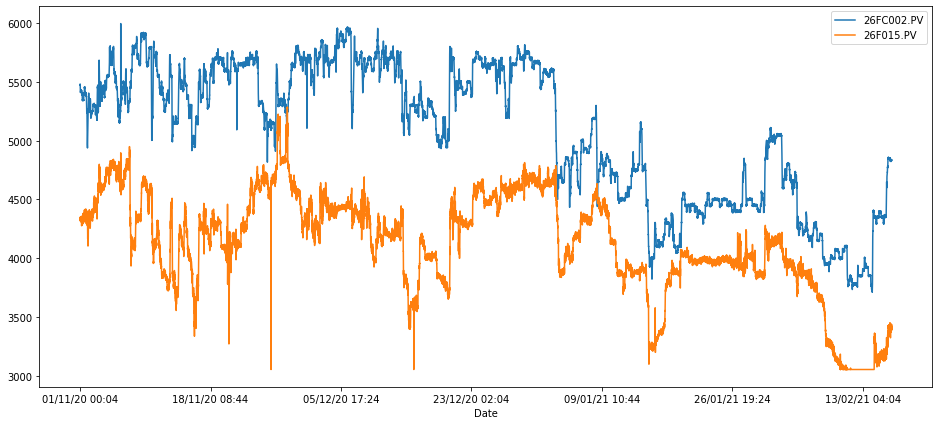

In [14]:
df[['26FC002.PV','26F015.PV']].plot(figsize=(16,7))

In [15]:
df.shape

(31104, 72)

# Feature Engineering : Shift Data 

In [16]:
lags = range(1, 50)  # lags for demonstration.
col_ = df.loc[:, ['27Q001.PV']] # change dataframe here

df_lag = df.assign(**{           # chage dataframe here
    '{} (t+{})'.format(col, t): col_[col].shift(-t)
    for t in lags
    for col in col_
})

df_lag = df_lag.dropna()
df_lag.tail()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,...,27Q001.PV (t+10),27Q001.PV (t+11),27Q001.PV (t+12),27Q001.PV (t+13),27Q001.PV (t+14),27Q001.PV (t+15),27Q001.PV (t+16),27Q001.PV (t+17),27Q001.PV (t+18),27Q001.PV (t+19),27Q001.PV (t+20),27Q001.PV (t+21),27Q001.PV (t+22),27Q001.PV (t+23),27Q001.PV (t+24),27Q001.PV (t+25),27Q001.PV (t+26),27Q001.PV (t+27),27Q001.PV (t+28),27Q001.PV (t+29),27Q001.PV (t+30),27Q001.PV (t+31),27Q001.PV (t+32),27Q001.PV (t+33),27Q001.PV (t+34),27Q001.PV (t+35),27Q001.PV (t+36),27Q001.PV (t+37),27Q001.PV (t+38),27Q001.PV (t+39),27Q001.PV (t+40),27Q001.PV (t+41),27Q001.PV (t+42),27Q001.PV (t+43),27Q001.PV (t+44),27Q001.PV (t+45),27Q001.PV (t+46),27Q001.PV (t+47),27Q001.PV (t+48),27Q001.PV (t+49)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16/02/21 19:34,4833.396973,4800.933287,286.855859,1307.117052,3316.262613,332.159380,314.692910,80.516685,79.852380,169.885796,64.814126,48.137653,24.006417,10.202526,11.852012,0.603223,0.583395,4.806118,23.458647,42.546176,30.012476,152.785251,207.419067,227.254857,128.904000,119.565678,225.412007,342.453094,36.698370,63.888231,201.231565,285.489274,110.342113,154.847814,119.340140,46.520861,41.713586,13.322972,4571.093707,2026.331744,...,12.735572,12.744309,12.750883,12.753979,12.755014,12.758898,12.764604,12.767487,12.764947,12.759749,12.752831,12.753190,12.754386,12.748745,12.736017,12.739730,12.737223,12.739807,12.742445,12.744021,12.754138,12.756233,12.768991,12.770285,12.783572,12.784415,12.795135,12.791217,12.799415,12.816746,12.820329,12.821554,12.821901,12.821222,12.812467,12.803787,12.799257,12.793880,12.802269,12.799257
16/02/21 19:39,4825.226636,4775.745420,288.693171,1312.385574,3293.205872,331.086959,314.709859,80.516685,79.981255,170.566295,64.814126,48.067217,24.008463,10.202702,11.852012,0.602796,0.583433,4.806152,23.503764,42.517474,29.991912,152.811920,207.447023,227.377596,129.060379,119.842604,225.443535,342.453094,36.651062,63.838591,201.295180,285.488752,110.342113,154.886406,119.338082,46.489023,41.740126,13.306611,4578.449961,2049.356994,...,12.744309,12.750883,12.753979,12.755014,12.758898,12.764604,12.767487,12.764947,12.759749,12.752831,12.753190,12.754386,12.748745,12.736017,12.739730,12.737223,12.739807,12.742445,12.744021,12.754138,12.756233,12.768991,12.770285,12.783572,12.784415,12.795135,12.791217,12.799415,12.816746,12.820329,12.821554,12.821901,12.821222,12.812467,12.803787,12.799257,12.793880,12.802269,12.799257,12.803970
16/02/21 19:44,4832.241821,4779.903987,286.782634,1312.899080,3240.248620,329.942795,313.626596,80.516685,80.004232,172.001166,64.814126,47.492708,24.008831,10.202879,11.852012,0.601649,0.581101,4.806187,23.476070,42.320542,29.971349,152.868510,207.468464,227.333291,129.116838,120.050736,225.493815,342.453094,36.603754,63.554345,201.267009,285.488231,110.342113,154.885357,119.389355,46.489795,41.766666,13.221441,4605.697959,2049.230301,...,12.750883,12.753979,12.755014,12.758898,12.764604,12.767487,12.764947,12.759749,12.752831,12.753190,12.754386,12.748745,12.736017,12.739730,12.737223,12.739807,12.742445,12.744021,12.754138,12.756233,12.768991,12.770285,12.783572,12.784415,12.795135,12.791217,12.799415,12.816746,12.820329,12.821554,12.821901,12.821222,12.812467,12.803787,12.799257,12.793880,12.802269,12.799257,12.803970,12.806603
16/02/21 19:49,4826.604357,4788.342763,284.530774,1320.769128,3243.847197,330.002763,312.816236,80.516685,80.634643,169.702263,64.814126,47.995821,24.008831,10.203055,11.852012,0.599484,0.577575,4.806222,23.449749,42.160293,29.950785,152.657992,207.500173,227.327124,12

# R-suqared from Regression

In [17]:
data = df_lag

In [18]:
all_features = data.drop(columns=['27Q001.PV','27Q001.PV (t+1)','27Q001.PV (t+2)','27Q001.PV (t+3)','27Q001.PV (t+4)','27Q001.PV (t+5)','27Q001.PV (t+6)','27Q001.PV (t+7)','27Q001.PV (t+8)','27Q001.PV (t+9)','27Q001.PV (t+10)','27Q001.PV (t+11)','27Q001.PV (t+12)','27Q001.PV (t+13)','27Q001.PV (t+14)','27Q001.PV (t+15)','27Q001.PV (t+16)','27Q001.PV (t+17)','27Q001.PV (t+18)','27Q001.PV (t+19)','27Q001.PV (t+20)','27Q001.PV (t+21)','27Q001.PV (t+22)','27Q001.PV (t+23)','27Q001.PV (t+24)','27Q001.PV (t+25)',
                                  '27Q001.PV (t+26)','27Q001.PV (t+27)','27Q001.PV (t+28)','27Q001.PV (t+29)','27Q001.PV (t+30)','27Q001.PV (t+31)','27Q001.PV (t+32)','27Q001.PV (t+33)','27Q001.PV (t+34)','27Q001.PV (t+35)','27Q001.PV (t+36)','27Q001.PV (t+37)','27Q001.PV (t+38)','27Q001.PV (t+39)','27Q001.PV (t+40)','27Q001.PV (t+41)','27Q001.PV (t+42)','27Q001.PV (t+43)','27Q001.PV (t+44)','27Q001.PV (t+45)','27Q001.PV (t+46)','27Q001.PV (t+47)','27Q001.PV (t+48)','27Q001.PV (t+49)'])
                                 #'Feed_max_temp','Feed_min_temp','bb_bbm','bb_bbh','bb_bbl'])

all_features.head()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP,26Reflux_Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/11/20 00:04,5473.115629,5131.270807,318.080306,1110.856587,2652.403192,378.712819,366.279280,0.0,79.701140,194.491751,60.547472,58.852298,24.016814,10.497668,11.652334,0.834066,0.630034,4.752970,24.043402,51.195625,28.041724,144.512998,208.840214,243.111857,112.372064,88.870162,241.940469,343.354577,38.542668,70.452314,197.887329,285.656868,106.394233,146.499334,128.536175,49.473139,40.006120,14.545120,5303.841444,2665.373443,60.040290,0.903485,93.240690,9.667305,4336.169676,21.609391,285.494263,106.452896,145.46529,128.833672,45.0,36.0,14.520891,5331.302148,2670.724609,60.580307,0.900216,93.251854,52.166014,49.940832,33.136327,43.0,100.0,100.0,86.865421,59.170822,73.779099,60.332616,23.262487,53.586819,3.527493
01/11/20 00:09,5471.262006,5081.340493,319.134491,1127.566286,2613.794010,377.868390,365.343753,0.0,79.617879,192.836177,60.096630,58.280724,24.013384,10.497708,11.660985,0.829459,0.630034,4.752970,23.962653,51.796681,28.057927,144.512998,208.929525,243.075671,112.464136,88.850364,241.935133,343.380525,38.678531,69.869067,197.858310,285.673758,106.664452,146.499334,126.501183,49.473139,40.022194,14.574691,5276.190712,2632.420992,60.727247,0.903363,93.232823,35.188276,4345.833726,21.527866,285.494263,106.452896,145.46529,126.396324,45.0,36.0,14.561488,5309.172892,2682.431335,60.580307,0.900216,93.251854,52.141203,50.735290,32.704735,43.0,100.0,100.0,86.859383,59.032778,73.733595,60.318392,23.849853,53.882208,3.533201
01/11/20 00:14,5479.180273,5095.179997,320.846591,1151.931683,2623.871195,377.715600,365.788448,0.0,80.304881,193.040518,59.783207,59.298287,24.009096,10.497748,11.633449,0.830741,0.630034,4.752970,24.047131,51.983227,28.074130,144.512998,208.910153,243.039486,112.433805,88.810572,241.933245,343.406473,38.814394,70.174556,197.915019,285.690649,106.954351,146.499334,129.400508,49.473139,40.038268,14.572604,5287.183491,2710.119549,60.871342,0.896268,93.224957,29.750202,4347.991391,21.533805,285.494263,106.452896,145.46529,130.537319,45.0,36.0,14.575893,5284.822754,2705.031921,60.580307,0.900216,93.251854,52.111623,51.563165,32.817743,43.0,100.0,100.0,86.853345,58.904995,73.688091,60.304167,22.652932,54.369436,3.583727
01/11/20 00:19,5482.488939,5129.542230,312.939935,1139.550162,2629.460838,377.889966,363.793576,0.0,80.337485,194.293915,59.983354,59.443846,24.004808,10.497787,11.640080,0.832466,0.630034,4.745240,23.951757,51.737983,28.090332,144.512998,208.767856,242.998496,112.295493,88.734148,241.690956,343.432421,38.860547,70.411297,197.742795,285.707539,106.722817,146.499334,128.764363,49.473139,40.054342,14.556982,5311.669655,2652.031082,59.714397,0.906447,93.227449,35.579547,4322.910183,21.589241,285.494263,106.452896,145.46529,129.532226,45.0,36.0,14.564852,5298.561816,2649.272461,60.580307,0.900216,93.251854,52.185040,51.476455,33.016266,43.0,100.0,100.0,86.847307,58.570629,73.642587,60.289942,23.154551,53.570654,3.624642
01/11/20 00:24,5481.876385,5158.356666,314.052522,1139.861553,2650.732445,377.816851,365.197092,0.0,79.785829,193.016933,60.252414,58.730868,24.000520,10.497827,11.652632,0.826482,0.630034,4.734404,24.035497,51.858895,28.106535,144.512998,208.781381,

In [19]:
target= data[['27Q001.PV','27Q001.PV (t+1)','27Q001.PV (t+2)','27Q001.PV (t+3)','27Q001.PV (t+4)','27Q001.PV (t+5)','27Q001.PV (t+6)','27Q001.PV (t+7)','27Q001.PV (t+8)','27Q001.PV (t+9)','27Q001.PV (t+10)','27Q001.PV (t+11)','27Q001.PV (t+12)','27Q001.PV (t+13)','27Q001.PV (t+14)','27Q001.PV (t+15)','27Q001.PV (t+16)','27Q001.PV (t+17)','27Q001.PV (t+18)','27Q001.PV (t+19)','27Q001.PV (t+20)','27Q001.PV (t+21)','27Q001.PV (t+22)','27Q001.PV (t+23)','27Q001.PV (t+24)','27Q001.PV (t+25)',
              '27Q001.PV (t+26)','27Q001.PV (t+27)','27Q001.PV (t+28)','27Q001.PV (t+29)','27Q001.PV (t+30)','27Q001.PV (t+31)','27Q001.PV (t+32)','27Q001.PV (t+33)','27Q001.PV (t+34)','27Q001.PV (t+35)','27Q001.PV (t+36)','27Q001.PV (t+37)','27Q001.PV (t+38)','27Q001.PV (t+39)','27Q001.PV (t+40)','27Q001.PV (t+41)','27Q001.PV (t+42)','27Q001.PV (t+43)','27Q001.PV (t+44)','27Q001.PV (t+45)','27Q001.PV (t+46)','27Q001.PV (t+47)','27Q001.PV (t+48)','27Q001.PV (t+49)']]

target.head()

,27Q001.PV,27Q001.PV (t+1),27Q001.PV (t+2),27Q001.PV (t+3),27Q001.PV (t+4),27Q001.PV (t+5),27Q001.PV (t+6),27Q001.PV (t+7),27Q001.PV (t+8),27Q001.PV (t+9),27Q001.PV (t+10),27Q001.PV (t+11),27Q001.PV (t+12),27Q001.PV (t+13),27Q001.PV (t+14),27Q001.PV (t+15),27Q001.PV (t+16),27Q001.PV (t+17),27Q001.PV (t+18),27Q001.PV (t+19),27Q001.PV (t+20),27Q001.PV (t+21),27Q001.PV (t+22),27Q001.PV (t+23),27Q001.PV (t+24),27Q001.PV (t+25),27Q001.PV (t+26),27Q001.PV (t+27),27Q001.PV (t+28),27Q001.PV (t+29),27Q001.PV (t+30),27Q001.PV (t+31),27Q001.PV (t+32),27Q001.PV (t+33),27Q001.PV (t+34),27Q001.PV (t+35),27Q001.PV (t+36),27Q001.PV (t+37),27Q001.PV (t+38),27Q001.PV (t+39),27Q001.PV (t+40),27Q001.PV (t+41),27Q001.PV (t+42),27Q001.PV (t+43),27Q001.PV (t+44),27Q001.PV (t+45),27Q001.PV (t+46),27Q001.PV (t+47),27Q001.PV (t+48),27Q001.PV (t+49)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/11/20 00:04,12.779194,12.792132,12.795286,12.808824,12.829266,12.849709,12.851052,12.851810,12.861214,12.880084,12.879793,12.878100,12.881130,12.871055,12.860981,12.850906,12.840832,12.830757,12.820683,12.810608,12.800805,12.801937,12.797616,12.791652,12.784196,12.776741,12.757459,12.749607,12.741755,12.723125,12.702931,12.683241,12.670008,12.656790,12.643573,12.630355,12.611044,12.597864,12.596291,12.593230,12.588513,12.584035,12.585688,12.566259,12.567519,12.577030,12.574822,12.581951,12.583407,12.599132
01/11/20 00:09,12.792132,12.795286,12.808824,12.829266,12.849709,12.851052,12.851810,12.861214,12.880084,12.879793,12.878100,12.881130,12.871055,12.860981,12.850906,12.840832,12.830757,12.820683,12.810608,12.800805,12.801937,12.797616,12.791652,12.784196,12.776741,12.757459,12.749607,12.741755,12.723125,12.702931,12.683241,12.670008,12.656790,12.643573,12.630355,12.611044,12.597864,12.596291,12.593230,12.588513,12.584035,12.585688,12.566259,12.567519,12.577030,12.574822,12.581951,12.583407,12.599132,12.596489
01/11/20 00:14,12.795286,12.808824,12.829266,12.849709,12.851052,12.851810,12.861214,12.880084,12.879793,12.878100,12.881130,12.871055,12.860981,12.850906,12.840832,12.830757,12.820683,12.810608,12.800805,12.801937,12.797616,12.791652,12.784196,12.776741,12.757459,12.749607,12.741755,12.723125,12.702931,12.683241,12.670008,12.656790,12.643573,12.630355,12.611044,12.597864,12.596291,12.593230,12.588513,12.584035,12.585688,12.566259,12.567519,12.577030,12.574822,12.581951,12.583407,12.599132,12.596489,12.591182
01/11/20 00:19,12.808824,12.829266,12.849709,12.851052,12.851810,12.861214,12.880084,12.879793,12.878100,12.881130,12.871055,12.860981,12.850906,12.840832,12.830757,12.820683,12.810608,12.800805,12.801937,12.797616,12.791652,12.784196,12.776741,12.757459,12.749607,12.741755,12.723125,12.702931,12.683241,12.670008,12.656790,12.643573,12.630355,12.611044,12.597864,12.596291,12.593230,12.588513,12.584035,12.585688,12.566259,12.567519,12.577030,12.574822,12.581951,12.583407,12.599132,12.596489,12.591182,12.585875
01/11/20 00:24,12.829266,12.849709,12.851052,12.851810,12.861214,12.880084,12.879793,12.878100,12.881130,12.871055,12.860981,12.850906,12.840832,12.830757,12.820683,12.810608,12.800805,12.801937,12.797616,12.791652,12.784196,12.776741,12.757459,12.749607,12.741755,12.723125,12.702931,12.683241,12.670008,12.656790,12.643573,12.630355,12.611044,12.597864,12.596291,12.593230,12.588513,12.584035,12.585688,12.566259,12.567519,12.577030,12.574822,12.581951,12.583407,12.599132,12.596489,12.591182,12.585875,12.586148


In [20]:
# from sklearn.model_selection import TimeSeriesSplit

# cv = TimeSeriesSplit(n_splits=5)
# for train, test in cv.split(X_train):
#   print('Train %s %s' %(train[0], train[-1]))
#   print('Test %s %s' %(test[0], test[-1]))
#   print('---')

In [21]:
#select_cols_T = [col for col in all_features.columns if 'T' in col]
#print(list(all_features.columns))
#print(select_cols_T)
# temp_cols = all_features.filter(regex='26T')
# temp_cols.head()

In [22]:
#select_cols_P = [col for col in all_features.columns if '26P' in col]
#print(list(all_features.columns))
#print(select_cols_T)
# press_cols = all_features.filter(regex='26P')
# press_cols.head()

In [23]:
#from sklearn.model_selection import cross_val_score

In [24]:
#cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')

In [25]:
# features_x = df_lag[['26FC002.PV','26F015.PV','26TC011.PV','26TC029.PV','26TC031.PV','26TC039.PV','26TC301.PV','26TC307.PV','26XC041.PV','27FC001.PV','27FC009.PV','27LC002.PV','27PC001.PV','27TC007.PV']]  # Main dataframe before Regression 
# features_x_2 = df_lag[['26FC002.PV','26F015.PV','26TC011.SP','26TC029.SP','26TC031.SP','26TC039.SP','26TC301.SP','26TC307.SP','26XC041.SP','27FC001.SP','27FC009.SP','27LC002.SP','27PC001.SP','27TC007.SP']]
# features_x_3 = df_lag[['26FC002.PV','26F015.PV','26TC011.PV','26TC029.PV','26TC031.PV','26TC039.PV','26TC301.PV','26TC307.PV','26XC041.SP','27FC001.PV','27FC009.PV','27LC002.PV','27PC001.PV','27TC007.PV']] #26XC041.SP
# features_x_4 = df_lag[['26FC002.PV','26F015.PV','26XC041.SP']]
# features_x_5 = df_lag[['26FC002.PV','26TC031.SP','26T045.PV','26F015.PV','26XC041.SP','26TC039.SP']]
#df_lag['26TC011.PV']

In [26]:
# model = LinearRegression()

# results_1 = cross_val_score(model, X_train, y_train.iloc[:,21], cv=cv, scoring='r2')
# results_1

# Non scaling features

In [27]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import *
from sklearn.metrics import r2_score

print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.22.2.post1


In [28]:
# Split Train & Test
split_size = int(0.8*len(df_lag))  # Train 80, test20
X_train, y_train = all_features[:split_size], target[:split_size]
X_test, y_test = all_features[split_size:], target[split_size:]

# Model result : R-squared
results = []

for i in range(1,50):
  model = LinearRegression() 
  model_fit = model.fit(X_train,y_train.iloc[:,i])
  y_test_pred = model_fit.predict(X_test)
  result = r2_score(y_test.iloc[:,i], y_test_pred)
  results.append(result)

# Print R_squared from non-sclaed features 
results

[0.5808514419054769,
 0.5726385583509268,
 0.5641636106463694,
 0.558778346466745,
 0.5560545805646666,
 0.5555192476409581,
 0.5564181161770559,
 0.5576158441417081,
 0.5637005902943188,
 0.5674295383609225,
 0.5713049947715781,
 0.5778115083677089,
 0.5887497662645531,
 0.6038118266032578,
 0.6216160195199829,
 0.6467742732295939,
 0.673756667929782,
 0.703535668081002,
 0.7298540143352268,
 0.7510030962427374,
 0.7702234748492586,
 0.7856449529445333,
 0.7988518484268818,
 0.8079961626012535,
 0.8145346902137238,
 0.8196641119287692,
 0.8231190145374812,
 0.8245114093764225,
 0.8247971354069404,
 0.8235987517666659,
 0.821004380827307,
 0.817541840174915,
 0.8140357492866941,
 0.8117486318582219,
 0.8102246944741531,
 0.8090753560606414,
 0.8094728696893909,
 0.8087795637272401,
 0.8088636657305635,
 0.8089546892512727,
 0.8086777971581417,
 0.8088714520861744,
 0.8096166231058234,
 0.8106440990691772,
 0.8109490731633578,
 0.8119488086331907,
 0.812450958470745,
 0.813279996653038,

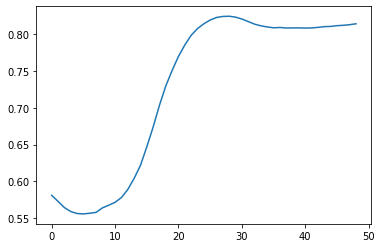

In [29]:
import numpy as np

plt.plot(results)

In [ ]:
# r_square_list=[]

# for i in range(1,50):
  #y_var = '27Q001.PV (t+{0})'.format(i)
  #X = data.loc[:, :'27FC009.PV']
  #X = all_features   # Chang set of Features here!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  #y = target[y_var]
  #results = cross_val_score(model, X_train, y_train.iloc[:,i], cv=cv, scoring='r2')
  #r_square_list.append(results[-1])

# Re-scaled : Max - Min

In [30]:
#StandardScaler().fit_transform(X)
#MinMaxScaler().fit_transform(X)
# MaxAbsScaler().fit_transform(X)
# RobustScaler(quantile_range=(25, 75)).fit_transform(X)
# PowerTransformer(method='yeo-johnson').fit_transform(X)
# PowerTransformer(method='box-cox').fit_transform(X)
# QuantileTransformer(output_distribution='uniform').fit_transform(X)
# QuantileTransformer(output_distribution='normal').fit_transform(X)
# Normalizer().fit_transform(X)

In [31]:
# Split Train & Test
split_size = int(0.8*len(df_lag))  # Train 80, test20
X_train, y_train = all_features[:split_size], target[:split_size]
X_test, y_test = all_features[split_size:], target[split_size:]

# Scaler 
scaler = MinMaxScaler()  # Change type of scaler here 
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index , columns = X_train.columns)

# Model 
results = []

for i in range(1,50):
  model = LinearRegression()
  model_fit = model.fit(normalized_x_train, y_train.iloc[:,1])
  y_test_pred = model_fit.predict(pd.DataFrame(scaler.transform(X_test), index=X_test.index , columns = X_test.columns))
  result = r2_score(y_test.iloc[:,i], y_test_pred)
  results.append(result)

# R-squared
results

[0.5808514419062325,
 0.5838630953420192,
 0.586752760867848,
 0.5896507957184652,
 0.5926226826868171,
 0.595646761405552,
 0.5986096576242113,
 0.601435759827124,
 0.6041958327263559,
 0.6069874236192672,
 0.6095024477686222,
 0.6118971946694086,
 0.614105159623947,
 0.616133180826766,
 0.6179554019250856,
 0.619640474514014,
 0.621035483476553,
 0.6221974641613885,
 0.6232003101320707,
 0.6240250679397534,
 0.624813657116995,
 0.6255367905434465,
 0.6261980506831963,
 0.6267201559725548,
 0.62704447835967,
 0.6271772915536333,
 0.6270735700580925,
 0.6265712413440893,
 0.6257880137137406,
 0.6247082083681585,
 0.6232365694351776,
 0.6215163926926146,
 0.6195675319156071,
 0.6173549491372778,
 0.6148535950532914,
 0.612151513549809,
 0.6093852110892324,
 0.6064901661640969,
 0.6036012057485752,
 0.6007369734004875,
 0.5980553783056151,
 0.5955586759240115,
 0.5932637319529344,
 0.5910960708776941,
 0.5890436901292404,
 0.5871294817587114,
 0.5853672312162446,
 0.5836615483589751,
 0.

# MaxAbs scaler

In [ ]:
# Split Train & Test
split_size = int(0.8*len(df_lag))  # Train 80, test20
X_train, y_train = all_features[:split_size], target[:split_size]
X_test, y_test = all_features[split_size:], target[split_size:]

# Scaler 
scaler = MaxAbsScaler()  # Change type of scaler here 
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index , columns = X_train.columns)

# Model 
results = []

for i in range(1,50):
  model = LinearRegression()
  model_fit = model.fit(normalized_x_train, y_train.iloc[:,1])
  y_test_pred = model_fit.predict(pd.DataFrame(scaler.transform(X_test), index=X_test.index , columns = X_test.columns))
  result = r2_score(y_test.iloc[:,i], y_test_pred)
  results.append(result)

# R-squared
results

[0.5808514419062558,
 0.5838630953420424,
 0.5867527608678713,
 0.5896507957184884,
 0.5926226826868404,
 0.5956467614055752,
 0.5986096576242345,
 0.6014357598271471,
 0.604195832726379,
 0.6069874236192903,
 0.6095024477686453,
 0.6118971946694316,
 0.6141051596239702,
 0.616133180826789,
 0.6179554019251086,
 0.6196404745140371,
 0.6210354834765759,
 0.6221974641614114,
 0.6232003101320935,
 0.6240250679397763,
 0.6248136571170178,
 0.6255367905434692,
 0.6261980506832191,
 0.6267201559725775,
 0.6270444783596927,
 0.6271772915536561,
 0.6270735700581151,
 0.6265712413441119,
 0.6257880137137631,
 0.624708208368181,
 0.6232365694352002,
 0.621516392692637,
 0.6195675319156295,
 0.6173549491373003,
 0.6148535950533137,
 0.6121515135498312,
 0.6093852110892546,
 0.6064901661641191,
 0.6036012057485975,
 0.6007369734005097,
 0.5980553783056373,
 0.5955586759240337,
 0.5932637319529566,
 0.5910960708777163,
 0.5890436901292626,
 0.5871294817587336,
 0.5853672312162668,
 0.58366154835899

# RobustScaler

In [ ]:
# Split Train & Test
split_size = int(0.8*len(df_lag))  # Train 80, test20
X_train, y_train = all_features[:split_size], target[:split_size]
X_test, y_test = all_features[split_size:], target[split_size:]

# Scaler 
scaler = RobustScaler(quantile_range=(25, 75))  # Change type of scaler here 
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index , columns = X_train.columns)

# Model 
results = []

for i in range(1,50):
  model = LinearRegression()
  model_fit = model.fit(normalized_x_train, y_train.iloc[:,1])
  y_test_pred = model_fit.predict(pd.DataFrame(scaler.transform(X_test), index=X_test.index , columns = X_test.columns))
  result = r2_score(y_test.iloc[:,i], y_test_pred)
  results.append(result)

# R-squared
results

[0.5808514419061193,
 0.5838630953419064,
 0.5867527608677356,
 0.5896507957183532,
 0.5926226826867056,
 0.5956467614054408,
 0.5986096576241006,
 0.6014357598270137,
 0.6041958327262462,
 0.6069874236191581,
 0.6095024477685136,
 0.6118971946693006,
 0.6141051596238395,
 0.616133180826659,
 0.617955401924979,
 0.6196404745139079,
 0.6210354834764471,
 0.6221974641612829,
 0.6232003101319652,
 0.6240250679396481,
 0.6248136571168896,
 0.625536790543341,
 0.6261980506830906,
 0.6267201559724489,
 0.6270444783595637,
 0.6271772915535269,
 0.6270735700579857,
 0.6265712413439821,
 0.6257880137136331,
 0.6247082083680509,
 0.6232365694350699,
 0.6215163926925068,
 0.6195675319154993,
 0.6173549491371702,
 0.6148535950531838,
 0.6121515135497015,
 0.6093852110891249,
 0.6064901661639897,
 0.6036012057484683,
 0.6007369734003807,
 0.5980553783055085,
 0.5955586759239049,
 0.593263731952828,
 0.5910960708775879,
 0.5890436901291342,
 0.5871294817586052,
 0.5853672312161382,
 0.58366154835886

# Power Scaler :yeo-johnson

In [ ]:
# Scaler

# scaler_yeo = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)

cols=['26FC002.PV', '26FC011.PV', '26FC016.PV', '26FC017.PV', '26FC027.PV',
       '26FC028.PV', '26FC029.PV', '26FC035.PV', '26FC301.PV', '26FC307.PV',
       '26LC008.PV', '26LC010.PV', '26PC007.PV', '26PC009.PV', '26PC010.PV',
       '26PC013.PV', '26PC038.PV', '26PC302.PV', '26PC305.PV', '26T025.PV',
       '26T027.PV', '26T032.PV', '26T033.PV', '26T034.PV', '26T035.PV',
       '26T038.PV', '26T041.PV', '26T042.PV', '26T043.PV', '26T044.PV',
       '26T045.PV', '26TC011.PV', '26TC029.PV', '26TC031.PV', '26TC039.PV',
       '26TC301.PV', '26TC307.PV', '26XC041.PV', '27FC001.PV', '27FC009.PV',
       '27LC002.PV', '27PC001.PV', '27TC007.PV', '26F014.PV', '26F015.PV',
       '26F019.PV', '26TC011.SP', '26TC029.SP', '26TC031.SP', '26TC039.SP',
       '26TC301.SP', '26TC307.SP', '26XC041.SP', '27FC001.SP', '27FC009.SP',
       '27LC002.SP', '27PC001.SP', '27TC007.SP', '26TC011.OP', '26TC029.OP',
       '26TC031.OP', '26TC039.OP', '26TC301.OP', '26TC307.OP', '26XC041.OP',
       '27FC001.OP', '27FC009.OP', '27LC002.OP', '27PC001.OP', '27TC007.OP',
       '26Reflux_Ratio']

# mat = pt.fit_transform(all_features[cols])
# mat_df = pd.DataFrame(mat, index=all_features.index,  columns=all_features.columns, dtype=float)

all_features_rescaled_yeo = PowerTransformer(method='yeo-johnson', standardize=False).fit_transform(all_features[cols])
all_features_rescaled_yeo_df = pd.DataFrame(all_features_rescaled_yeo, index=all_features.index,  columns=all_features.columns, dtype=float)

# Split Train & Test
split_size = int(0.8*len(df_lag))  # Train 80, test20
X_train, y_train = all_features_rescaled_yeo_df[:split_size], target[:split_size]
X_test, y_test = all_features_rescaled_yeo_df[split_size:], target[split_size:]

# Model result : R-squared
results = []

for i in range(1,50):
  model = LinearRegression() 
  model_fit = model.fit(X_train,y_train.iloc[:,i])
  y_test_pred = model_fit.predict(X_test)
  result = r2_score(y_test.iloc[:,i], y_test_pred)
  results.append(result)

# Print R_squared from sclaer features 
results

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


ValueError: ignored

# Power scaler : Box - Cox

In [ ]:
# Scaler
all_features_rescaled_power_boxcox = PowerTransformer(method='box-cox').fit_transform(all_features)
all_features_rescaled_power_boxcox_df = pd.DataFrame(all_features_rescaled_power_boxcox, index=all_features.index,  columns=all_features.columns, dtype=float)

# Split Train & Test
split_size = int(0.8*len(df_lag))  # Train 80, test20
X_train, y_train = all_features_rescaled_power_boxcox_df[:split_size], target[:split_size]
X_test, y_test = all_features_rescaled_power_boxcox_df[split_size:], target[split_size:]

# Model result : R-squared
results = []

for i in range(1,50):
  model = LinearRegression() 
  model_fit = model.fit(X_train,y_train.iloc[:,i])
  y_test_pred = model_fit.predict(X_test)
  result = r2_score(y_test.iloc[:,i], y_test_pred)
  results.append(result)

# Print R_squared from sclaer features 
results

ValueError: ignored

# Re-scaled : Quantile_uniform

In [ ]:
# Scaler 
scaler = QuantileTransformer(output_distribution='uniform')  # Change type of scaler here 
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index , columns = X_train.columns)

# Model 
results = []

for i in range(1,50):
  model = LinearRegression()
  model_fit = model.fit(normalized_x_train, y_train.iloc[:,1])
  y_test_pred = model_fit.predict(pd.DataFrame(scaler.transform(X_test), index=X_test.index , columns = X_test.columns))
  result = r2_score(y_test.iloc[:,i], y_test_pred)
  results.append(result)

# R-squared
results

[0.2289155845000539,
 0.23157795532035075,
 0.23421174680404822,
 0.23687184581374277,
 0.23961600067505673,
 0.24236178475936077,
 0.24518643312343202,
 0.24799163884399156,
 0.2507684486302354,
 0.25347991154928196,
 0.25608701005146317,
 0.2585256440444468,
 0.26074768873564846,
 0.2627501225488428,
 0.2644458476894185,
 0.2657390208170175,
 0.2666392430850114,
 0.26717892565330537,
 0.26723463006879933,
 0.2667390303016359,
 0.26587226021070676,
 0.2648977845404158,
 0.26389228337489057,
 0.2629439027945024,
 0.262057425021357,
 0.2611736746218395,
 0.2602802572651216,
 0.2593082452065125,
 0.25827088973398327,
 0.2571876930871365,
 0.2560290643609572,
 0.25477465164724367,
 0.2534482458483218,
 0.2519129262402716,
 0.25019293929358566,
 0.2483782895311093,
 0.24658986033034413,
 0.24472690766580318,
 0.24278479885680881,
 0.24091224976388914,
 0.23912185286597143,
 0.23731933045349451,
 0.2355596679143781,
 0.2338737852930981,
 0.23220079623379564,
 0.2305219175163865,
 0.22886665

# Re-scaled : Quantile Normal

In [ ]:
# Scaler 
scaler = QuantileTransformer(output_distribution='normal')  # Change type of scaler here 
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index , columns = X_train.columns)

# Model 
results = []

for i in range(1,50):
  model = LinearRegression()
  model_fit = model.fit(normalized_x_train, y_train.iloc[:,1])
  y_test_pred = model_fit.predict(pd.DataFrame(scaler.transform(X_test), index=X_test.index , columns = X_test.columns))
  result = r2_score(y_test.iloc[:,i], y_test_pred)
  results.append(result)

# R-squared
results

[-0.4380129433747979,
 -0.4354448506544899,
 -0.4327369718259182,
 -0.4298221395581714,
 -0.42689076212732147,
 -0.42388537300312024,
 -0.420702876484768,
 -0.4176488175708921,
 -0.4147168781152606,
 -0.4117518890287337,
 -0.40897909811518063,
 -0.40639543611500817,
 -0.40387906547871033,
 -0.40164650262060997,
 -0.3995144955502592,
 -0.3975870996328903,
 -0.3961291465830077,
 -0.3951111165070822,
 -0.39457174856831423,
 -0.39440797183033593,
 -0.394571513602312,
 -0.39499403964436985,
 -0.3956809777452708,
 -0.3964278212263619,
 -0.39735877452053625,
 -0.39834329156601633,
 -0.3993656314413867,
 -0.40043253275137225,
 -0.40139805106290916,
 -0.4024746908767163,
 -0.40355903870676535,
 -0.4045559777754826,
 -0.405405395214246,
 -0.4063905679873354,
 -0.4073482943150024,
 -0.40828239972697666,
 -0.4092665836215197,
 -0.4102024163895346,
 -0.41093845401625173,
 -0.41177654949673426,
 -0.4126454776711703,
 -0.4135337745440295,
 -0.41449727661234825,
 -0.41540696987014414,
 -0.416382129708

# Re-scaled : Normalizer

In [ ]:
# Split Train & Test
split_size = int(0.8*len(df_lag))  # Train 80, test20
X_train, y_train = all_features[:split_size], target[:split_size]
X_test, y_test = all_features[split_size:], target[split_size:]

# Scaler 
scaler = Normalizer()  # Change type of scaler here 
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index , columns = X_train.columns)

# Model 
results = []

for i in range(1,50):
  model = LinearRegression()
  model_fit = model.fit(normalized_x_train, y_train.iloc[:,1])
  y_test_pred = model_fit.predict(pd.DataFrame(scaler.transform(X_test), index=X_test.index , columns = X_test.columns))
  result = r2_score(y_test.iloc[:,i], y_test_pred)
  results.append(result)

# R-squared
results

[0.5608831378405106,
 0.5639510064376231,
 0.5668531861305829,
 0.5697693975028473,
 0.5727662919224301,
 0.5758470648557072,
 0.5788307627529683,
 0.5816441131716722,
 0.5843890067289277,
 0.58717423729842,
 0.5895683969141315,
 0.5918445920329287,
 0.593895598046918,
 0.5957527790569431,
 0.5973871025186078,
 0.5989041041187932,
 0.6001480247042753,
 0.6011673725499461,
 0.6020133801609123,
 0.6027370349587162,
 0.603504025110791,
 0.6042387162712446,
 0.6049259085962087,
 0.6054526343397452,
 0.6057770363588335,
 0.6059209195577631,
 0.6057474854022811,
 0.6050555004313714,
 0.6040417121724093,
 0.6027209458767286,
 0.6009143153012533,
 0.5988249474441211,
 0.5964914043655453,
 0.5938569791276564,
 0.590865041893057,
 0.5876262108776503,
 0.584310080439412,
 0.5808221492408292,
 0.5773131326582097,
 0.5738130798314844,
 0.570532264021676,
 0.5674680533599672,
 0.5646419616721334,
 0.5619582516415547,
 0.5594101567703615,
 0.5570194876717687,
 0.5548182542613883,
 0.5527090609274654,

# Re-scaled : StandardScaler

In [ ]:
# Split Train & Test
split_size = int(0.8*len(df_lag)) 
X_train, y_train = all_features[:split_size], target[:split_size]
X_test, y_test = all_features[split_size:], target[split_size:]

# Scaler 
scaler = StandardScaler()  # Change type of scaler here 
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index , columns = X_train.columns)

# Model 
results = []

for i in range(1,50):
  model = LinearRegression()
  model_fit = model.fit(normalized_x_train, y_train.iloc[:,1])
  y_test_pred = model_fit.predict(pd.DataFrame(scaler.transform(X_test), index=X_test.index , columns = X_test.columns))
  result = r2_score(y_test.iloc[:,i], y_test_pred)
  results.append(result)

# R-squared
results

[0.5808514419062274,
 0.5838630953420142,
 0.586752760867843,
 0.5896507957184604,
 0.5926226826868122,
 0.5956467614055471,
 0.5986096576242064,
 0.6014357598271192,
 0.6041958327263511,
 0.6069874236192625,
 0.6095024477686175,
 0.611897194669404,
 0.6141051596239424,
 0.6161331808267614,
 0.617955401925081,
 0.6196404745140095,
 0.6210354834765486,
 0.622197464161384,
 0.6232003101320662,
 0.6240250679397491,
 0.6248136571169907,
 0.6255367905434419,
 0.6261980506831919,
 0.6267201559725504,
 0.6270444783596656,
 0.6271772915536289,
 0.6270735700580881,
 0.6265712413440849,
 0.6257880137137362,
 0.6247082083681541,
 0.6232365694351731,
 0.6215163926926102,
 0.6195675319156027,
 0.6173549491372734,
 0.614853595053287,
 0.6121515135498045,
 0.6093852110892277,
 0.6064901661640923,
 0.6036012057485708,
 0.600736973400483,
 0.5980553783056106,
 0.595558675924007,
 0.5932637319529299,
 0.5910960708776898,
 0.589043690129236,
 0.5871294817587069,
 0.5853672312162401,
 0.5836615483589709,


# Try Box Cox

In [ ]:
all_features.columns

Index(['26FC002.PV', '26FC011.PV', '26FC016.PV', '26FC017.PV', '26FC027.PV',
       '26FC028.PV', '26FC029.PV', '26FC035.PV', '26FC301.PV', '26FC307.PV',
       '26LC008.PV', '26LC010.PV', '26PC007.PV', '26PC009.PV', '26PC010.PV',
       '26PC013.PV', '26PC038.PV', '26PC302.PV', '26PC305.PV', '26T025.PV',
       '26T027.PV', '26T032.PV', '26T033.PV', '26T034.PV', '26T035.PV',
       '26T038.PV', '26T041.PV', '26T042.PV', '26T043.PV', '26T044.PV',
       '26T045.PV', '26TC011.PV', '26TC029.PV', '26TC031.PV', '26TC039.PV',
       '26TC301.PV', '26TC307.PV', '26XC041.PV', '27FC001.PV', '27FC009.PV',
       '27LC002.PV', '27PC001.PV', '27TC007.PV', '26F014.PV', '26F015.PV',
       '26F019.PV', '26TC011.SP', '26TC029.SP', '26TC031.SP', '26TC039.SP',
       '26TC301.SP', '26TC307.SP', '26XC041.SP', '27FC001.SP', '27FC009.SP',
       '27LC002.SP', '27PC001.SP', '27TC007.SP', '26TC011.OP', '26TC029.OP',
       '26TC031.OP', '26TC039.OP', '26TC301.OP', '26TC307.OP', '26XC041.OP',
       '27FC00

In [ ]:
from sklearn import preprocessing

pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)

cols=['26FC002.PV', '26FC011.PV', '26FC016.PV', '26FC017.PV', '26FC027.PV',
       '26FC028.PV', '26FC029.PV', '26FC035.PV', '26FC301.PV', '26FC307.PV',
       '26LC008.PV', '26LC010.PV', '26PC007.PV', '26PC009.PV', '26PC010.PV',
       '26PC013.PV', '26PC038.PV', '26PC302.PV', '26PC305.PV', '26T025.PV',
       '26T027.PV', '26T032.PV', '26T033.PV', '26T034.PV', '26T035.PV',
       '26T038.PV', '26T041.PV', '26T042.PV', '26T043.PV', '26T044.PV',
       '26T045.PV', '26TC011.PV', '26TC029.PV', '26TC031.PV', '26TC039.PV',
       '26TC301.PV', '26TC307.PV', '26XC041.PV', '27FC001.PV', '27FC009.PV',
       '27LC002.PV', '27PC001.PV', '27TC007.PV', '26F014.PV', '26F015.PV',
       '26F019.PV', '26TC011.SP', '26TC029.SP', '26TC031.SP', '26TC039.SP',
       '26TC301.SP', '26TC307.SP', '26XC041.SP', '27FC001.SP', '27FC009.SP',
       '27LC002.SP', '27PC001.SP', '27TC007.SP', '26TC011.OP', '26TC029.OP',
       '26TC031.OP', '26TC039.OP', '26TC301.OP', '26TC307.OP', '26XC041.OP',
       '27FC001.OP', '27FC009.OP', '27LC002.OP', '27PC001.OP', '27TC007.OP',
       '26Reflux_Ratio']

mat = pt.fit_transform(all_features[cols])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


array([[ 6.06989240e+012,  6.29556598e+010,  1.15040384e-001,
         3.39650398e+002,  3.68025572e+001,  3.46536038e+004,
         4.17588929e+004, -3.65516850e+001,  1.48058023e-001,
         1.41697957e+005,  1.97402877e-001,  5.27644983e-001,
         2.63598504e+152,  3.48083521e-002,  2.98437456e-002,
         6.27461127e-001,  5.47266579e+000,  4.71355655e-002,
         3.81336387e+011,  7.59556098e+001,  4.00275412e+004,
         1.15040384e-001,  1.15040384e-001,  1.15040384e-001,
         1.15040384e-001,  7.76165468e+001,  1.15040384e-001,
         7.56750333e+132,  1.04570015e+000,  6.45393600e+004,
         1.81949587e+002,  9.37596592e+043,  1.23750025e-001,
         1.15040384e-001,  1.15040384e-001,  8.11781053e-001,
         1.70881570e+001,  1.20225103e+002,  1.38502845e+012,
         1.15040384e-001,  3.47850808e+009,  4.66952155e+018,
         9.54647052e+006,  5.19069947e+000,  3.48861228e+011,
         1.27928646e+001,              inf,  1.23750025e-001,
        

In [ ]:
mat_df = pd.DataFrame(mat, index=all_features.index,  columns=all_features.columns, dtype=float)
mat_df.head()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP,26Reflux_Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/11/20 00:04,6.069892e+12,6.295566e+10,0.11504,339.650398,36.802557,34653.603751,41758.892855,-36.551685,0.148058,141697.956530,0.197403,0.527645,2.635985e+152,0.034808,0.029844,0.627461,5.472666,0.047136,3.813364e+11,75.955610,40027.541210,0.11504,0.11504,0.11504,0.11504,77.616547,0.11504,7.567503e+132,1.045700,64539.359964,181.949587,9.375966e+43,0.12375,0.11504,0.11504,0.811781,17.088157,120.225103,1.385028e+12,0.11504,3.478508e+09,4.669522e+18,9.546471e+06,5.190699,3.488612e+11,12.792865,inf,0.12375,0.11504,0.11504,854.505151,135.716363,119.460511,3.344313e+12,0.11504,4.025718e+12,1.888710e+43,6.977601e+06,1130.052128,27.860330,5.222523,7.146483,27.330999,143.171241,1.594139,7.346884e+13,3729.521331,4.072335,1.288135,1.424431,0.873563
01/11/20 00:09,6.062564e+12,6.111172e+10,0.11504,343.740597,36.613058,34510.022025,41555.843846,-33.115985,0.148058,138816.600819,0.197403,0.527641,2.596354e+152,0.034808,0.029844,0.624771,5.472666,0.047136,3.704586e+11,76.954753,40106.189899,0.11504,0.11504,0.11504,0.11504,77.599883,0.11504,7.597817e+132,1.045815,63055.082596,181.923410,9.386141e+43,0.12375,0.11504,0.11504,0.811781,17.093132,120.684753,1.360618e+12,0.11504,3.710529e+09,4.647721e+18,9.543418e+06,12.528778,3.514460e+11,12.754127,inf,0.12375,0.11504,0.11504,854.505151,135.716363,120.088313,3.295895e+12,0.11504,4.025718e+12,1.888710e+43,6.977601e+06,1129.031104,28.223510,5.195944,7.146483,27.330999,143.171241,1.594134,7.207996e+13,3724.812274,4.072108,1.290759,1.424832,0.873936
01/11/20 00:14,6.093915e+12,6.161913e+10,0.11504,349.683090,36.662699,34484.072211,41652.302686,-42.859129,0.148058,139170.359110,0.197403,0.527648,2.547644e+152,0.034808,0.029844,0.625520,5.472666,0.047136,3.818455e+11,77.265150,40184.949197,0.11504,0.11504,0.11504,0.11504,77.566389,0.11504,7.628250e+132,1.045928,63829.718080,181.974564,9.396327e+43,0.12375,0.11504,0.11504,0.811781,17.098106,120.652286,1.370286e+12,0.11504,3.760784e+09,3.532568e+18,9.540366e+06,11.217142,3.520249e+11,12.756950,inf,0.12375,0.11504,0.11504,854.505151,135.716363,120.311471,3.243201e+12,0.11504,4.025718e+12,1.888710e+43,6.977601e+06,1127.814437,28.600788,5.202930,7.146483,27.330999,143.171241,1.594128,7.081495e+13,3720.106299,4.071881,1.285296,1.425484,0.877201
01/11/20 00:19,6.107050e+12,6.289121e+10,0.11504,346.666532,36.690179,34513.687374,41220.428820,-35.868096,0.148058,141351.817721,0.197403,0.527649,2.499839e+152,0.034808,0.029844,0.626528,5.472666,0.047136,3.690121e+11,76.857114,40263.819150,0.11504,0.11504,0.11504,0.11504,77.502061,0.11504,7.658802e+132,1.045967,64434.243817,181.819209,9.406523e+43,0.12375,0.11504,0.11504,0.811781,17.103079,120.409386,1.391995e+12,0.11504,3.372710e+09,5.234595e+18,9.541333e+06,12.619953,3.453364e+11,12.783293,inf,0.12375,0.11504,0.11504,854.505151,135.716363,120.140403,3.272858e+12,0.11504,4.025718e+12,1.888710e+43,6.977601e+06,1130.835329,28.561328,5.215156,7.146483,27.330999,143.171241,1.594123,6.759678e+13,3715.403406,4.071654,1.287642,1.424409,0.879798
01/11/20 00:24,6.104617e+12,6.397140e+10,0.11504,346.742478,36.794396,34501.267625,41524.054981,-32.534044,0.148058,139129.501917,0.197403,0.52764

In [ ]:
# Target Tranform

cols_label = ['27Q001.PV', '27Q001.PV (t+1)', '27Q001.PV (t+2)', '27Q001.PV (t+3)',
       '27Q001.PV (t+4)', '27Q001.PV (t+5)', '27Q001.PV (t+6)',
       '27Q001.PV (t+7)', '27Q001.PV (t+8)', '27Q001.PV (t+9)',
       '27Q001.PV (t+10)', '27Q001.PV (t+11)', '27Q001.PV (t+12)',
       '27Q001.PV (t+13)', '27Q001.PV (t+14)', '27Q001.PV (t+15)',
       '27Q001.PV (t+16)', '27Q001.PV (t+17)', '27Q001.PV (t+18)',
       '27Q001.PV (t+19)', '27Q001.PV (t+20)', '27Q001.PV (t+21)',
       '27Q001.PV (t+22)', '27Q001.PV (t+23)', '27Q001.PV (t+24)',
       '27Q001.PV (t+25)', '27Q001.PV (t+26)', '27Q001.PV (t+27)',
       '27Q001.PV (t+28)', '27Q001.PV (t+29)', '27Q001.PV (t+30)',
       '27Q001.PV (t+31)', '27Q001.PV (t+32)', '27Q001.PV (t+33)',
       '27Q001.PV (t+34)', '27Q001.PV (t+35)', '27Q001.PV (t+36)',
       '27Q001.PV (t+37)', '27Q001.PV (t+38)', '27Q001.PV (t+39)',
       '27Q001.PV (t+40)', '27Q001.PV (t+41)', '27Q001.PV (t+42)',
       '27Q001.PV (t+43)', '27Q001.PV (t+44)', '27Q001.PV (t+45)',
       '27Q001.PV (t+46)', '27Q001.PV (t+47)', '27Q001.PV (t+48)',
       '27Q001.PV (t+49)']

pt_label = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)
mat_label = pt_label.fit_transform(target[cols_label])

In [ ]:
mat_label_df = pd.DataFrame(mat_label, index=target.index,  columns=target.columns, dtype=float)
mat_label_df.head()

,27Q001.PV,27Q001.PV (t+1),27Q001.PV (t+2),27Q001.PV (t+3),27Q001.PV (t+4),27Q001.PV (t+5),27Q001.PV (t+6),27Q001.PV (t+7),27Q001.PV (t+8),27Q001.PV (t+9),27Q001.PV (t+10),27Q001.PV (t+11),27Q001.PV (t+12),27Q001.PV (t+13),27Q001.PV (t+14),27Q001.PV (t+15),27Q001.PV (t+16),27Q001.PV (t+17),27Q001.PV (t+18),27Q001.PV (t+19),27Q001.PV (t+20),27Q001.PV (t+21),27Q001.PV (t+22),27Q001.PV (t+23),27Q001.PV (t+24),27Q001.PV (t+25),27Q001.PV (t+26),27Q001.PV (t+27),27Q001.PV (t+28),27Q001.PV (t+29),27Q001.PV (t+30),27Q001.PV (t+31),27Q001.PV (t+32),27Q001.PV (t+33),27Q001.PV (t+34),27Q001.PV (t+35),27Q001.PV (t+36),27Q001.PV (t+37),27Q001.PV (t+38),27Q001.PV (t+39),27Q001.PV (t+40),27Q001.PV (t+41),27Q001.PV (t+42),27Q001.PV (t+43),27Q001.PV (t+44),27Q001.PV (t+45),27Q001.PV (t+46),27Q001.PV (t+47),27Q001.PV (t+48),27Q001.PV (t+49)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/11/20 00:04,472068.949219,474421.277561,474816.548541,477227.079664,480954.200762,484664.018545,484602.357963,484454.704980,486036.368810,489496.147528,489136.049942,488510.446257,488844.525354,486587.332863,484343.107865,482102.106149,479866.613011,477659.847867,475485.333306,473322.694220,471201.655399,471225.633647,470190.836599,468863.991965,467280.790794,465729.204659,461996.689173,460508.358178,459092.893474,455688.151117,452115.612088,448738.108264,446667.689088,444648.023208,442709.013163,440866.797794,437982.607837,436296.648188,436766.753743,436971.566955,436867.832331,436804.821127,437861.182852,435071.162455,436128.486380,438678.820070,439072.620934,441191.770511,442256.301237,445970.829938
01/11/20 00:09,474574.366268,475033.517870,477450.444681,481225.020524,484977.226352,484929.098655,484752.033358,486312.022091,489778.806099,489438.389495,488799.844815,489111.929991,486847.807955,484598.468882,482362.057757,480128.867124,477901.174206,475702.096341,473535.140377,471432.235676,471419.554703,470394.835012,469046.621718,467437.540536,465858.422650,462067.980594,460512.884228,459028.490909,455596.601595,451922.429285,448466.894656,446297.906306,444239.131854,442227.950758,440296.974576,437357.309825,435596.954762,436012.192728,436212.541403,436117.080045,436056.412041,437104.794164,434339.822928,435299.262097,437856.723585,438276.336624,440375.834209,441458.805265,445154.969909,445481.611044
01/11/20 00:14,475186.818467,477668.705053,481450.392907,485250.476158,485242.490168,485078.882273,486610.573038,490056.736060,489721.012301,489101.961530,489401.710664,487114.041521,484857.802440,482616.298859,480387.677876,478162.276540,475942.362058,473750.950064,471643.771927,471650.249342,470588.389401,469250.087735,467619.574417,466014.660688,462196.109333,460583.930082,459033.001361,455532.724989,451831.691065,448275.383795,446028.274525,443871.505483,441821.446386,439818.723445,436792.351585,434975.310097,435312.988708,435459.007546,435359.646750,435307.155642,436355.833663,433589.958458,434567.511199,437023.973540,437455.049295,439577.014122,440642.339160,444351.865349,444666.711039,444500.582617
01/11/20 00:19,477822.917865,481670.614830,485477.870860,485515.900250,485392.377593,486938.765964,490357.752902,489998.907095,489384.376024,489704.226304,487402.553081,485122.869193,482874.495040,480640.803143,478419.950594,476202.316815,473990.159030,471858.657275,471861.890514,470818.647829,469443.136971,467822.376561,466196.100312,462351.030325,460711.617466,459103.802349,455537.198604,451768.380520,448185.430873,445837.880593,443603.446000,441455.965977,439414.594477,436318.183289,434413.652361,434691.778813,434760.755221,434607.693445,434551.231371,435606.025290,432847.457357,433817.224987,436289.111702,436623.118787,438753.111721,439843.000448,443529.657957,443864.551377,443687.607526,443521.332717
01/11/20 00:24,481826.213621,485700.068947,485743.428336,485665.878242,487253.550442,490688.656671,490299.885848,489662.065981,489987.013721,487703.743780,485410.116256,483138.399230,480897.866091,478671.964095,476458.858317,474248.970399,472096.8416

In [ ]:
# Fillna with Mean
mat_df = mat_df.fillna(mat_df.mean())
mat_df.head()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP,26Reflux_Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/11/20 00:04,6.069892e+12,6.295566e+10,0.11504,339.650398,36.802557,34653.603751,41758.892855,-36.551685,0.148058,141697.956530,0.197403,0.527645,2.635985e+152,0.034808,0.029844,0.627461,5.472666,0.047136,3.813364e+11,75.955610,40027.541210,0.11504,0.11504,0.11504,0.11504,77.616547,0.11504,7.567503e+132,1.045700,64539.359964,181.949587,9.375966e+43,0.12375,0.11504,0.11504,0.811781,17.088157,120.225103,1.385028e+12,0.11504,3.478508e+09,4.669522e+18,9.546471e+06,5.190699,3.488612e+11,12.792865,inf,0.12375,0.11504,0.11504,854.505151,135.716363,119.460511,3.344313e+12,0.11504,4.025718e+12,1.888710e+43,6.977601e+06,1130.052128,27.860330,5.222523,7.146483,27.330999,143.171241,1.594139,7.346884e+13,3729.521331,4.072335,1.288135,1.424431,0.873563
01/11/20 00:09,6.062564e+12,6.111172e+10,0.11504,343.740597,36.613058,34510.022025,41555.843846,-33.115985,0.148058,138816.600819,0.197403,0.527641,2.596354e+152,0.034808,0.029844,0.624771,5.472666,0.047136,3.704586e+11,76.954753,40106.189899,0.11504,0.11504,0.11504,0.11504,77.599883,0.11504,7.597817e+132,1.045815,63055.082596,181.923410,9.386141e+43,0.12375,0.11504,0.11504,0.811781,17.093132,120.684753,1.360618e+12,0.11504,3.710529e+09,4.647721e+18,9.543418e+06,12.528778,3.514460e+11,12.754127,inf,0.12375,0.11504,0.11504,854.505151,135.716363,120.088313,3.295895e+12,0.11504,4.025718e+12,1.888710e+43,6.977601e+06,1129.031104,28.223510,5.195944,7.146483,27.330999,143.171241,1.594134,7.207996e+13,3724.812274,4.072108,1.290759,1.424832,0.873936
01/11/20 00:14,6.093915e+12,6.161913e+10,0.11504,349.683090,36.662699,34484.072211,41652.302686,-42.859129,0.148058,139170.359110,0.197403,0.527648,2.547644e+152,0.034808,0.029844,0.625520,5.472666,0.047136,3.818455e+11,77.265150,40184.949197,0.11504,0.11504,0.11504,0.11504,77.566389,0.11504,7.628250e+132,1.045928,63829.718080,181.974564,9.396327e+43,0.12375,0.11504,0.11504,0.811781,17.098106,120.652286,1.370286e+12,0.11504,3.760784e+09,3.532568e+18,9.540366e+06,11.217142,3.520249e+11,12.756950,inf,0.12375,0.11504,0.11504,854.505151,135.716363,120.311471,3.243201e+12,0.11504,4.025718e+12,1.888710e+43,6.977601e+06,1127.814437,28.600788,5.202930,7.146483,27.330999,143.171241,1.594128,7.081495e+13,3720.106299,4.071881,1.285296,1.425484,0.877201
01/11/20 00:19,6.107050e+12,6.289121e+10,0.11504,346.666532,36.690179,34513.687374,41220.428820,-35.868096,0.148058,141351.817721,0.197403,0.527649,2.499839e+152,0.034808,0.029844,0.626528,5.472666,0.047136,3.690121e+11,76.857114,40263.819150,0.11504,0.11504,0.11504,0.11504,77.502061,0.11504,7.658802e+132,1.045967,64434.243817,181.819209,9.406523e+43,0.12375,0.11504,0.11504,0.811781,17.103079,120.409386,1.391995e+12,0.11504,3.372710e+09,5.234595e+18,9.541333e+06,12.619953,3.453364e+11,12.783293,inf,0.12375,0.11504,0.11504,854.505151,135.716363,120.140403,3.272858e+12,0.11504,4.025718e+12,1.888710e+43,6.977601e+06,1130.835329,28.561328,5.215156,7.146483,27.330999,143.171241,1.594123,6.759678e+13,3715.403406,4.071654,1.287642,1.424409,0.879798
01/11/20 00:24,6.104617e+12,6.397140e+10,0.11504,346.742478,36.794396,34501.267625,41524.054981,-32.534044,0.148058,139129.501917,0.197403,0.52764

In [ ]:
mat_label_df = mat_label_df.fillna(mat_label_df.mean())
mat_label_df.head()

,27Q001.PV,27Q001.PV (t+1),27Q001.PV (t+2),27Q001.PV (t+3),27Q001.PV (t+4),27Q001.PV (t+5),27Q001.PV (t+6),27Q001.PV (t+7),27Q001.PV (t+8),27Q001.PV (t+9),27Q001.PV (t+10),27Q001.PV (t+11),27Q001.PV (t+12),27Q001.PV (t+13),27Q001.PV (t+14),27Q001.PV (t+15),27Q001.PV (t+16),27Q001.PV (t+17),27Q001.PV (t+18),27Q001.PV (t+19),27Q001.PV (t+20),27Q001.PV (t+21),27Q001.PV (t+22),27Q001.PV (t+23),27Q001.PV (t+24),27Q001.PV (t+25),27Q001.PV (t+26),27Q001.PV (t+27),27Q001.PV (t+28),27Q001.PV (t+29),27Q001.PV (t+30),27Q001.PV (t+31),27Q001.PV (t+32),27Q001.PV (t+33),27Q001.PV (t+34),27Q001.PV (t+35),27Q001.PV (t+36),27Q001.PV (t+37),27Q001.PV (t+38),27Q001.PV (t+39),27Q001.PV (t+40),27Q001.PV (t+41),27Q001.PV (t+42),27Q001.PV (t+43),27Q001.PV (t+44),27Q001.PV (t+45),27Q001.PV (t+46),27Q001.PV (t+47),27Q001.PV (t+48),27Q001.PV (t+49)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/11/20 00:04,472068.949219,474421.277561,474816.548541,477227.079664,480954.200762,484664.018545,484602.357963,484454.704980,486036.368810,489496.147528,489136.049942,488510.446257,488844.525354,486587.332863,484343.107865,482102.106149,479866.613011,477659.847867,475485.333306,473322.694220,471201.655399,471225.633647,470190.836599,468863.991965,467280.790794,465729.204659,461996.689173,460508.358178,459092.893474,455688.151117,452115.612088,448738.108264,446667.689088,444648.023208,442709.013163,440866.797794,437982.607837,436296.648188,436766.753743,436971.566955,436867.832331,436804.821127,437861.182852,435071.162455,436128.486380,438678.820070,439072.620934,441191.770511,442256.301237,445970.829938
01/11/20 00:09,474574.366268,475033.517870,477450.444681,481225.020524,484977.226352,484929.098655,484752.033358,486312.022091,489778.806099,489438.389495,488799.844815,489111.929991,486847.807955,484598.468882,482362.057757,480128.867124,477901.174206,475702.096341,473535.140377,471432.235676,471419.554703,470394.835012,469046.621718,467437.540536,465858.422650,462067.980594,460512.884228,459028.490909,455596.601595,451922.429285,448466.894656,446297.906306,444239.131854,442227.950758,440296.974576,437357.309825,435596.954762,436012.192728,436212.541403,436117.080045,436056.412041,437104.794164,434339.822928,435299.262097,437856.723585,438276.336624,440375.834209,441458.805265,445154.969909,445481.611044
01/11/20 00:14,475186.818467,477668.705053,481450.392907,485250.476158,485242.490168,485078.882273,486610.573038,490056.736060,489721.012301,489101.961530,489401.710664,487114.041521,484857.802440,482616.298859,480387.677876,478162.276540,475942.362058,473750.950064,471643.771927,471650.249342,470588.389401,469250.087735,467619.574417,466014.660688,462196.109333,460583.930082,459033.001361,455532.724989,451831.691065,448275.383795,446028.274525,443871.505483,441821.446386,439818.723445,436792.351585,434975.310097,435312.988708,435459.007546,435359.646750,435307.155642,436355.833663,433589.958458,434567.511199,437023.973540,437455.049295,439577.014122,440642.339160,444351.865349,444666.711039,444500.582617
01/11/20 00:19,477822.917865,481670.614830,485477.870860,485515.900250,485392.377593,486938.765964,490357.752902,489998.907095,489384.376024,489704.226304,487402.553081,485122.869193,482874.495040,480640.803143,478419.950594,476202.316815,473990.159030,471858.657275,471861.890514,470818.647829,469443.136971,467822.376561,466196.100312,462351.030325,460711.617466,459103.802349,455537.198604,451768.380520,448185.430873,445837.880593,443603.446000,441455.965977,439414.594477,436318.183289,434413.652361,434691.778813,434760.755221,434607.693445,434551.231371,435606.025290,432847.457357,433817.224987,436289.111702,436623.118787,438753.111721,439843.000448,443529.657957,443864.551377,443687.607526,443521.332717
01/11/20 00:24,481826.213621,485700.068947,485743.428336,485665.878242,487253.550442,490688.656671,490299.885848,489662.065981,489987.013721,487703.743780,485410.116256,483138.399230,480897.866091,478671.964095,476458.858317,474248.970399,472096.8416

In [ ]:
# Split Train & Test
split_size = int(0.8*len(df_lag))  # Train 80, test20
X_train, y_train = mat_df[:split_size], mat_label_df[:split_size]
X_test, y_test = mat_df[split_size:], mat_label_df[split_size:]

# Model result : R-squared
results = []

for i in range(1,50):
  model = LinearRegression() 
  model_fit = model.fit(X_train,y_train.iloc[:,i])
  y_test_pred = model_fit.predict(X_test)
  result = r2_score(y_test.iloc[:,i], y_test_pred)
  results.append(result)

# Print R_squared from sclaer features 
results

ValueError: ignored

In [ ]:
# Split Train & Test
split_size = int(0.8*len(df_lag))  # Train 80, test20
X_train, y_train = mat_df[:split_size], mat_label_df[:split_size]
X_test, y_test = mat_df[split_size:], mat_label_df[split_size:]
X_train = X_train.fillna(X_train.mean(), inplace=True)

# Model
model = LinearRegression() 
model_fit = model.fit(X_train,y_train)
y_test_pred = model_fit.predict(X_test)
result = r2_score(y_test, y_test_pred)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


ValueError: ignored

In [ ]:
X_train.fillna(X_train.mean(), inplace=True)

AttributeError: ignored

In [ ]:
import numpy as np
from scipy.stats import boxcox

In [ ]:
def log_likelihood(lmbda, x, y):
    n, p = x.shape
    lnjacobi = (lmbda - 1) * np.sum(np.log(y))
    trans_y = scipy.stats.boxcox(y, lmbda=lmbda)
    xtxinv = np.linalg.inv(np.matmul(np.transpose(x), x))
    imxxtxinvxt = np.subtract(np.identity(n), np.matmul(np.matmul(x, xtxinv), np.transpose(x)))
    rss = np.matmul(np.matmul(np.transpose(trans_y), imxxtxinvxt), trans_y)
    return - n / 2.0 * np.ndarray.flatten(np.log(rss)) + lnjacobi

In [ ]:
potential_lmbdas = np.linspace(a, b, t)
likelihoods = np.array([log_likelihood(lmbda, x, y) for lmbda in potential_lmbdas])
plt.plot(potential_lmbdas, likelihoods)
print('Estimation for lambda:', potential_lmbdas[np.argmax(likelihoods)])

NameError: ignored

In [ ]:
x = np.linspace(0, 10, 50)
y = (x + np.random.rand(50)) ** 2 * np.pi
x = np.reshape(x, (50, 1))
y = np.reshape(y, (50, 1))

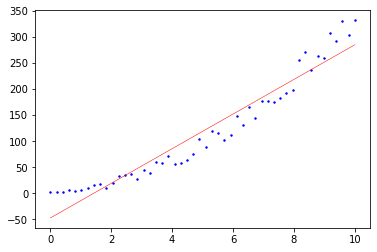

In [ ]:
regressor = sklearn.linear_model.LinearRegression()
regressor.fit(x, y)
plt.plot(x, regressor.predict(x), color='red', linewidth=0.5)
plt.scatter(x, y, color='blue', s=2)

In [ ]:
import scipy

potential_lmbdas = np.linspace(-3, 3, 1000)
likelihoods = np.array([log_likelihood(lmbda, x, y) for lmbda in potential_lmbdas])
plt.plot(potential_lmbdas, likelihoods)
print('Estimation for lambda:', potential_lmbdas[np.argmax(likelihoods)])

ValueError: ignored

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor, LinearRegression 

In [ ]:
# Pipeline 
pipeline = Pipeline(steps=[('power',PowerTransformer()), 'model', HuberRegressor()])

# model 
model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer(method='yeo-johnson', standardize=False))

TypeError: ignored

In [ ]:
# r_square = pd.DataFrame(results, columns=['r_square'])
# #r_square.loc[-1] = [str('0.6135973043878704')]  
# r_square.index = r_square.index + 1  
# r_square.sort_index(inplace=True) 
# r_square = r_square.astype(float)
# r_square

# Try : data is dataframe that contains all features and lag labels

In [ ]:
# def correlation_heatmap(data, cutoff=None, title=''):
#     df_corr = data.corr('pearson')
#     np.fill_diagonal(df_corr.values, 0)
#     if cutoff != None:
#         for col in df_corr.columns:
#             df_corr.loc[df_corr[col].abs() <= cutoff, col] = 0
#     fig, ax = plt.subplots(figsize=(15, 10))
#     sns.heatmap(df_corr, ax=ax, cmap='RdBu_r')
#     plt.suptitle(title, size=18)
#     plt.show()
#     return df_corr


# cutoff = .1
# df_corr = correlation_heatmap(data, 
#                     cutoff, 'Correlation Matrix With Absolute Value Cutoff of {}'.format(cutoff)) 

In [32]:
data.describe()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,...,27Q001.PV (t+10),27Q001.PV (t+11),27Q001.PV (t+12),27Q001.PV (t+13),27Q001.PV (t+14),27Q001.PV (t+15),27Q001.PV (t+16),27Q001.PV (t+17),27Q001.PV (t+18),27Q001.PV (t+19),27Q001.PV (t+20),27Q001.PV (t+21),27Q001.PV (t+22),27Q001.PV (t+23),27Q001.PV (t+24),27Q001.PV (t+25),27Q001.PV (t+26),27Q001.PV (t+27),27Q001.PV (t+28),27Q001.PV (t+29),27Q001.PV (t+30),27Q001.PV (t+31),27Q001.PV (t+32),27Q001.PV (t+33),27Q001.PV (t+34),27Q001.PV (t+35),27Q001.PV (t+36),27Q001.PV (t+37),27Q001.PV (t+38),27Q001.PV (t+39),27Q001.PV (t+40),27Q001.PV (t+41),27Q001.PV (t+42),27Q001.PV (t+43),27Q001.PV (t+44),27Q001.PV (t+45),27Q001.PV (t+46),27Q001.PV (t+47),27Q001.PV (t+48),27Q001.PV (t+49)
count,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,...,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000
mean,5083.550364,5040.584996,332.171861,1511.745952,2796.664736,339.906842,318.105197,238.760989,80.128924,164.891050,57.011476,52.968324,23.907204,10.324648,11.702480,0.599023,0.528994,4.754743,23.795707,46.891326,28.224627,148.974707,207.204923,230.120401,125.445039,109.275835,227.864087,338.557924,36.077241,64.412920,199.329379,285.503518,107.787742,150.948700,118.167989,45.679085,40.643601,15.011822,4810.360006,2266.952128,...,12.604367,12.604363,12.604360,12.604356,12.604353,12.604349,12.604346,12.604343,12.604341,12.604339,12.604336,12.604334,12.604332,12.604330,12.604329,12.604327,12.604327,12.604327,12.604327,12.604328,12.604330,12.604333,12.604336,12.604340,12.604345,12.604350,12.604357,12.604363,12.604371,12.604378,12.604385,12.604392,12.604399,12.604405,12.604413,12.604421,12.604428,12.604435,12.604443,12.604450
std,595.793081,594.057367,54.556423,237.779639,891.235111,50.292550,48.168504,185.572321,0.579095,13.381741,2.977754,6.708719,0.130094,0.152473,0.075732,0.171977,0.115601,0.027866,0.282666,7.361942,1.936453,2.321808,3.259540,7.826921,6.036205,9.078770,8.343188,5.095485,3.741652,4.465251,2.888690,0.157075,1.270193,2.343952,6.256021,1.554318,2.696061,1.398230,574.165105,289.978678,...,0.333355,0.333352,0.333350,0.333347,0.333345,0.333343,0.333341,0.333340,0.333338,0.333337,0.333336,0.333335,0.333334,0.333333,0.333332,0.333331,0.333331,0.333331,0.333331,0.333332,0.333333,0.333334,0.333335,0.333337,0.333338,0.333340,0.333343,0.333345,0.333347,0.333349,0.333352,0.333353,0.333355,0.333357,0.333359,0.333361,0.333362,0.333364,0.333366,0.333369
min,3709.158450,2959.188486,194.929099,807.724498,430.363376,245.543310,220.182577,0.000000,78.755262,132.138219,48.928092,37.028328,23.574380,10.192924,11.530914,0.295409,0.275479,4.677039,22.806919,32.664928,23.429759,144.512998,200.028039,215.617885,110

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31055 entries, 01/11/20 00:04 to 16/02/21 19:54
Columns: 121 entries, 26FC002.PV to 27Q001.PV (t+49)
dtypes: float64(121)
memory usage: 28.9+ MB


In [35]:
df_corr = data.corr()
df_corr

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,...,27Q001.PV (t+10),27Q001.PV (t+11),27Q001.PV (t+12),27Q001.PV (t+13),27Q001.PV (t+14),27Q001.PV (t+15),27Q001.PV (t+16),27Q001.PV (t+17),27Q001.PV (t+18),27Q001.PV (t+19),27Q001.PV (t+20),27Q001.PV (t+21),27Q001.PV (t+22),27Q001.PV (t+23),27Q001.PV (t+24),27Q001.PV (t+25),27Q001.PV (t+26),27Q001.PV (t+27),27Q001.PV (t+28),27Q001.PV (t+29),27Q001.PV (t+30),27Q001.PV (t+31),27Q001.PV (t+32),27Q001.PV (t+33),27Q001.PV (t+34),27Q001.PV (t+35),27Q001.PV (t+36),27Q001.PV (t+37),27Q001.PV (t+38),27Q001.PV (t+39),27Q001.PV (t+40),27Q001.PV (t+41),27Q001.PV (t+42),27Q001.PV (t+43),27Q001.PV (t+44),27Q001.PV (t+45),27Q001.PV (t+46),27Q001.PV (t+47),27Q001.PV (t+48),27Q001.PV (t+49)
26FC002.PV,1.000000,0.989080,0.792691,0.066829,0.291928,0.981869,0.986025,0.498661,0.232575,-0.313455,-0.008744,-0.120040,-0.687522,0.533924,-0.460554,0.915486,0.945870,-0.244797,0.754892,0.813465,0.245917,-0.203501,0.131163,-0.130467,0.105778,0.276077,-0.159879,-0.568311,-0.028965,-0.133907,-0.096299,-0.017107,-0.474096,-0.203027,0.691876,0.006255,-0.521548,0.790550,0.993482,0.827095,...,0.407873,0.408641,0.409386,0.410103,0.410787,0.411416,0.411979,0.412462,0.412848,0.413109,0.413240,0.413227,0.413058,0.412730,0.412243,0.411595,0.410792,0.409848,0.408776,0.407588,0.406302,0.404931,0.403485,0.401981,0.400430,0.398843,0.397232,0.395604,0.393969,0.392330,0.390690,0.389051,0.387420,0.385803,0.384203,0.382622,0.381060,0.379521,0.378002,0.376505
26FC011.PV,0.989080,1.000000,0.812379,0.125325,0.314882,0.975384,0.974513,0.539596,0.236741,-0.306285,-0.039678,-0.137394,-0.713161,0.503995,-0.448037,0.893399,0.922114,-0.242500,0.728388,0.790655,0.219030,-0.143255,0.099020,-0.191186,0.155408,0.334584,-0.221518,-0.581904,-0.044568,-0.165352,-0.102690,-0.015694,-0.449652,-0.143430,0.634485,-0.061329,-0.493416,0.809931,0.977889,0.793550,...,0.399658,0.400522,0.401357,0.402135,0.402871,0.403538,0.404116,0.404566,0.404877,0.405046,0.405059,0.404895,0.404541,0.404013,0.403321,0.402464,0.401461,0.400322,0.399070,0.397723,0.396290,0.394799,0.393243,0.391643,0.390013,0.388360,0.386688,0.385001,0.383311,0.381627,0.379943,0.378260,0.376592,0.374943,0.373319,0.371715,0.370131,0.368568,0.367034,0.365523
26FC016.PV,0.792691,0.812379,1.000000,0.535603,0.496920,0.822342,0.782676,0.547860,0.368557,-0.221739,-0.000168,-0.165765,-0.826100,0.151257,-0.203843,0.604779,0.678850,-0.228264,0.440947,0.512322,0.011199,-0.138443,-0.311396,-0.161164,-0.054065,0.185999,-0.161633,-0.249731,-0.032796,-0.139606,-0.468586,0.043801,-0.385424,-0.143426,0.273301,-0.137075,-0.591929,0.840758,0.747510,0.718495,...,0.362804,0.361665,0.360394,0.359017,0.357536,0.355947,0.354269,0.352573,0.350933,0.349378,0.347947,0.346612,0.345425,0.344431,0.343556,0.342781,0.342127,0.341594,0.341113,0.340689,0.340298,0.339949,0.339642,0.339363,0.339159,0.338975,0.338845,0.338781,0.338718,0.338683,0.338649,0.338618,0.338551,0.338456,0.338357,0.338248,0.338143,0.337995,0.337839,0.337694
26FC017.PV,0.066829,0.125325,0.535603,1.000000,0.389914,0.132326,0.052003,0.138977,0.387894,0.269003,0.065850,-0.097573,-0.440470,-0.456323,0.119119,-0.170428,-0.105083,-0.134362,-0.263967,-0.201431,-0.281358,0.043197,-0.660805,-0.045667,-0.181427,0.009947,-0.011859,0.265809,0.167817,-0.011947,-0.624726,0.049937,0.034741,0.035846,-0.442264,-0.178889,-0.243632,0.528159,0.002354,0.058237,...,0.120182,0.116966,0.113791,0.110690,0.107713,0.104901,0.102328,0.100029,0.098035,0.096386,0.095081,0.094096,0.093420,0.093028,0.092886,0.092952,0.093178,0.093543,0.094012,0.094572,0.095202,0.095897,0.096651,0.097446,0.098285,0.099156,0

In [141]:
plt.plot(data[['27Q001.PV (t+29)']].rolling(72).mean())
#data[['26FC002.PV','27FC001.PV']].rolling(72).mean().plot(figsize=(16,9))
#data[['26XC041.PV']].rolling(72).mean().plot(figsize=(16,9))
plt.plot(data[['26XC041.PV']].rolling(72).mean())

Error in callback <function flush_figures at 0x7fd75bee2440> (for post_execute):


KeyboardInterrupt: ignored

In [144]:
test_t29 = data[['26XC041.PV','27Q001.PV (t+29)','26F015.PV','26T045.PV','26FC002.PV','27TC007.SP']].rolling(72).mean()
test_t29 = test_t29.dropna()
test_t29.head()

,26XC041.PV,27Q001.PV (t+29),26F015.PV,26T045.PV,26FC002.PV,27TC007.SP
Date,,,,,,
01/11/20 05:59,14.550165,12.584197,4326.966147,198.137138,5425.916238,93.251854
01/11/20 06:04,14.549693,12.581684,4326.862831,198.149208,5424.832558,93.251854
01/11/20 06:09,14.548119,12.579328,4326.442397,198.161141,5423.828394,93.251854
01/11/20 06:14,14.545633,12.577124,4325.587047,198.170983,5422.738134,93.251854
01/11/20 06:19,14.545170,12.574983,4325.642055,198.183104,5421.448185,93.251854


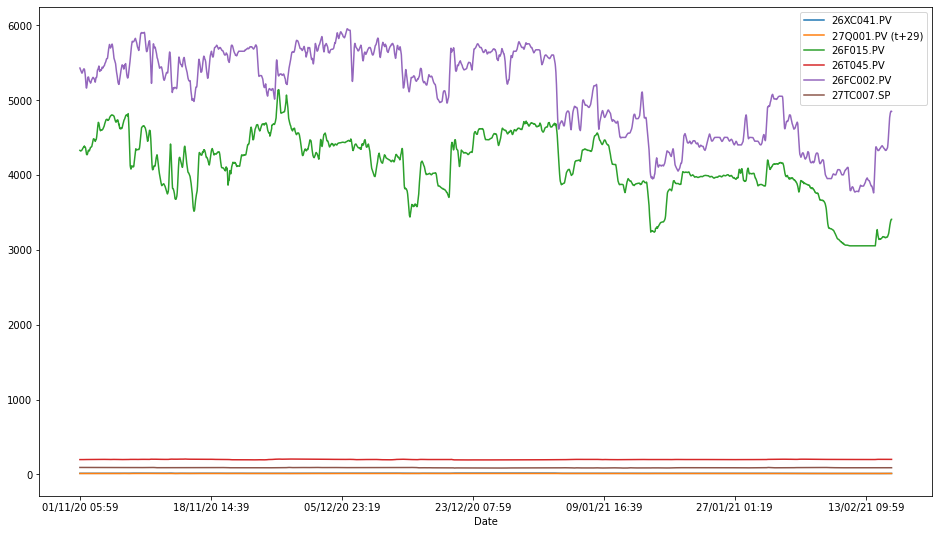

In [146]:
test_t29.plot(figsize=(16,9))

In [ ]:
test_t29[['27TC007.PV']].plot(figsize=(16,9))

In [47]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_corr['27Q001.PV (t+29)'].sort_values(ascending=False))

27Q001.PV (t+29)    1.000000
27Q001.PV (t+30)    0.998806
27Q001.PV (t+28)    0.998806
27Q001.PV (t+31)    0.996395
27Q001.PV (t+27)    0.996395
27Q001.PV (t+32)    0.992970
27Q001.PV (t+26)    0.992969
27Q001.PV (t+33)    0.988642
27Q001.PV (t+25)    0.988640
27Q001.PV (t+34)    0.983508
27Q001.PV (t+24)    0.983505
27Q001.PV (t+35)    0.977660
27Q001.PV (t+23)    0.977654
27Q001.PV (t+36)    0.971435
27Q001.PV (t+22)    0.971427
27Q001.PV (t+37)    0.964659
27Q001.PV (t+21)    0.964647
27Q001.PV (t+38)    0.957428
27Q001.PV (t+20)    0.957411
27Q001.PV (t+39)    0.949838
27Q001.PV (t+19)    0.949816
27Q001.PV (t+40)    0.941965
27Q001.PV (t+18)    0.941936
27Q001.PV (t+41)    0.933866
27Q001.PV (t+17)    0.933831
27Q001.PV (t+42)    0.925589
27Q001.PV (t+16)    0.925546
27Q001.PV (t+43)    0.917165
27Q001.PV (t+15)    0.917114
27Q001.PV (t+44)    0.908626
27Q001.PV (t+14)    0.908564
27Q001.PV (t+45)    0.899996
27Q001.PV (t+13)    0.899924
27Q001.PV (t+46)    0.891322
27Q001.PV (t+1

# Try lasso with lag 26,29

In [60]:
df_26 = data.drop(columns=['27Q001.PV','27Q001.PV (t+1)','27Q001.PV (t+2)','27Q001.PV (t+3)','27Q001.PV (t+4)','27Q001.PV (t+5)','27Q001.PV (t+6)','27Q001.PV (t+7)','27Q001.PV (t+8)','27Q001.PV (t+9)','27Q001.PV (t+10)','27Q001.PV (t+11)','27Q001.PV (t+12)','27Q001.PV (t+13)','27Q001.PV (t+14)','27Q001.PV (t+15)','27Q001.PV (t+16)','27Q001.PV (t+17)','27Q001.PV (t+18)','27Q001.PV (t+19)','27Q001.PV (t+20)','27Q001.PV (t+21)','27Q001.PV (t+22)','27Q001.PV (t+23)','27Q001.PV (t+24)','27Q001.PV (t+25)',
                                  '27Q001.PV (t+27)','27Q001.PV (t+28)','27Q001.PV (t+29)','27Q001.PV (t+30)','27Q001.PV (t+31)','27Q001.PV (t+32)','27Q001.PV (t+33)','27Q001.PV (t+34)','27Q001.PV (t+35)','27Q001.PV (t+36)','27Q001.PV (t+37)','27Q001.PV (t+38)','27Q001.PV (t+39)','27Q001.PV (t+40)','27Q001.PV (t+41)','27Q001.PV (t+42)','27Q001.PV (t+43)','27Q001.PV (t+44)','27Q001.PV (t+45)','27Q001.PV (t+46)','27Q001.PV (t+47)','27Q001.PV (t+48)','27Q001.PV (t+49)'])
                                 #'Feed_max_temp','Feed_min_temp','bb_bbm','bb_bbh','bb_bbl'])

df_26.head()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP,26Reflux_Ratio,27Q001.PV (t+26)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/11/20 00:04,5473.115629,5131.270807,318.080306,1110.856587,2652.403192,378.712819,366.279280,0.0,79.701140,194.491751,60.547472,58.852298,24.016814,10.497668,11.652334,0.834066,0.630034,4.752970,24.043402,51.195625,28.041724,144.512998,208.840214,243.111857,112.372064,88.870162,241.940469,343.354577,38.542668,70.452314,197.887329,285.656868,106.394233,146.499334,128.536175,49.473139,40.006120,14.545120,5303.841444,2665.373443,60.040290,0.903485,93.240690,9.667305,4336.169676,21.609391,285.494263,106.452896,145.46529,128.833672,45.0,36.0,14.520891,5331.302148,2670.724609,60.580307,0.900216,93.251854,52.166014,49.940832,33.136327,43.0,100.0,100.0,86.865421,59.170822,73.779099,60.332616,23.262487,53.586819,3.527493,12.757459
01/11/20 00:09,5471.262006,5081.340493,319.134491,1127.566286,2613.794010,377.868390,365.343753,0.0,79.617879,192.836177,60.096630,58.280724,24.013384,10.497708,11.660985,0.829459,0.630034,4.752970,23.962653,51.796681,28.057927,144.512998,208.929525,243.075671,112.464136,88.850364,241.935133,343.380525,38.678531,69.869067,197.858310,285.673758,106.664452,146.499334,126.501183,49.473139,40.022194,14.574691,5276.190712,2632.420992,60.727247,0.903363,93.232823,35.188276,4345.833726,21.527866,285.494263,106.452896,145.46529,126.396324,45.0,36.0,14.561488,5309.172892,2682.431335,60.580307,0.900216,93.251854,52.141203,50.735290,32.704735,43.0,100.0,100.0,86.859383,59.032778,73.733595,60.318392,23.849853,53.882208,3.533201,12.749607
01/11/20 00:14,5479.180273,5095.179997,320.846591,1151.931683,2623.871195,377.715600,365.788448,0.0,80.304881,193.040518,59.783207,59.298287,24.009096,10.497748,11.633449,0.830741,0.630034,4.752970,24.047131,51.983227,28.074130,144.512998,208.910153,243.039486,112.433805,88.810572,241.933245,343.406473,38.814394,70.174556,197.915019,285.690649,106.954351,146.499334,129.400508,49.473139,40.038268,14.572604,5287.183491,2710.119549,60.871342,0.896268,93.224957,29.750202,4347.991391,21.533805,285.494263,106.452896,145.46529,130.537319,45.0,36.0,14.575893,5284.822754,2705.031921,60.580307,0.900216,93.251854,52.111623,51.563165,32.817743,43.0,100.0,100.0,86.853345,58.904995,73.688091,60.304167,22.652932,54.369436,3.583727,12.741755
01/11/20 00:19,5482.488939,5129.542230,312.939935,1139.550162,2629.460838,377.889966,363.793576,0.0,80.337485,194.293915,59.983354,59.443846,24.004808,10.497787,11.640080,0.832466,0.630034,4.745240,23.951757,51.737983,28.090332,144.512998,208.767856,242.998496,112.295493,88.734148,241.690956,343.432421,38.860547,70.411297,197.742795,285.707539,106.722817,146.499334,128.764363,49.473139,40.054342,14.556982,5311.669655,2652.031082,59.714397,0.906447,93.227449,35.579547,4322.910183,21.589241,285.494263,106.452896,145.46529,129.532226,45.0,36.0,14.564852,5298.561816,2649.272461,60.580307,0.900216,93.251854,52.185040,51.476455,33.016266,43.0,100.0,100.0,86.847307,58.570629,73.642587,60.289942,23.154551,53.570654,3.624642,12.723125
01/11/20 00:24,5481.876385,5158.356666,314.052522,1139.861553,2650.732445,377.816851,365.197092,0.0,79.785829,193.016933,60.252414,58.730868,24.000520,10.497827,11.652632,0.826482,0.630034,4.7

In [81]:
#df_26.to_csv('data_lag_26.csv')

In [82]:
#df_29.to_csv('data_lag_29.csv')

In [61]:
df_29 = data.drop(columns=['27Q001.PV','27Q001.PV (t+1)','27Q001.PV (t+2)','27Q001.PV (t+3)','27Q001.PV (t+4)','27Q001.PV (t+5)','27Q001.PV (t+6)','27Q001.PV (t+7)','27Q001.PV (t+8)','27Q001.PV (t+9)','27Q001.PV (t+10)','27Q001.PV (t+11)','27Q001.PV (t+12)','27Q001.PV (t+13)','27Q001.PV (t+14)','27Q001.PV (t+15)','27Q001.PV (t+16)','27Q001.PV (t+17)','27Q001.PV (t+18)','27Q001.PV (t+19)','27Q001.PV (t+20)','27Q001.PV (t+21)','27Q001.PV (t+22)','27Q001.PV (t+23)','27Q001.PV (t+24)','27Q001.PV (t+25)',
                                  '27Q001.PV (t+27)','27Q001.PV (t+28)','27Q001.PV (t+26)','27Q001.PV (t+30)','27Q001.PV (t+31)','27Q001.PV (t+32)','27Q001.PV (t+33)','27Q001.PV (t+34)','27Q001.PV (t+35)','27Q001.PV (t+36)','27Q001.PV (t+37)','27Q001.PV (t+38)','27Q001.PV (t+39)','27Q001.PV (t+40)','27Q001.PV (t+41)','27Q001.PV (t+42)','27Q001.PV (t+43)','27Q001.PV (t+44)','27Q001.PV (t+45)','27Q001.PV (t+46)','27Q001.PV (t+47)','27Q001.PV (t+48)','27Q001.PV (t+49)'])
                                 #'Feed_max_temp','Feed_min_temp','bb_bbm','bb_bbh','bb_bbl'])

df_29.head()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP,26Reflux_Ratio,27Q001.PV (t+29)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/11/20 00:04,5473.115629,5131.270807,318.080306,1110.856587,2652.403192,378.712819,366.279280,0.0,79.701140,194.491751,60.547472,58.852298,24.016814,10.497668,11.652334,0.834066,0.630034,4.752970,24.043402,51.195625,28.041724,144.512998,208.840214,243.111857,112.372064,88.870162,241.940469,343.354577,38.542668,70.452314,197.887329,285.656868,106.394233,146.499334,128.536175,49.473139,40.006120,14.545120,5303.841444,2665.373443,60.040290,0.903485,93.240690,9.667305,4336.169676,21.609391,285.494263,106.452896,145.46529,128.833672,45.0,36.0,14.520891,5331.302148,2670.724609,60.580307,0.900216,93.251854,52.166014,49.940832,33.136327,43.0,100.0,100.0,86.865421,59.170822,73.779099,60.332616,23.262487,53.586819,3.527493,12.723125
01/11/20 00:09,5471.262006,5081.340493,319.134491,1127.566286,2613.794010,377.868390,365.343753,0.0,79.617879,192.836177,60.096630,58.280724,24.013384,10.497708,11.660985,0.829459,0.630034,4.752970,23.962653,51.796681,28.057927,144.512998,208.929525,243.075671,112.464136,88.850364,241.935133,343.380525,38.678531,69.869067,197.858310,285.673758,106.664452,146.499334,126.501183,49.473139,40.022194,14.574691,5276.190712,2632.420992,60.727247,0.903363,93.232823,35.188276,4345.833726,21.527866,285.494263,106.452896,145.46529,126.396324,45.0,36.0,14.561488,5309.172892,2682.431335,60.580307,0.900216,93.251854,52.141203,50.735290,32.704735,43.0,100.0,100.0,86.859383,59.032778,73.733595,60.318392,23.849853,53.882208,3.533201,12.702931
01/11/20 00:14,5479.180273,5095.179997,320.846591,1151.931683,2623.871195,377.715600,365.788448,0.0,80.304881,193.040518,59.783207,59.298287,24.009096,10.497748,11.633449,0.830741,0.630034,4.752970,24.047131,51.983227,28.074130,144.512998,208.910153,243.039486,112.433805,88.810572,241.933245,343.406473,38.814394,70.174556,197.915019,285.690649,106.954351,146.499334,129.400508,49.473139,40.038268,14.572604,5287.183491,2710.119549,60.871342,0.896268,93.224957,29.750202,4347.991391,21.533805,285.494263,106.452896,145.46529,130.537319,45.0,36.0,14.575893,5284.822754,2705.031921,60.580307,0.900216,93.251854,52.111623,51.563165,32.817743,43.0,100.0,100.0,86.853345,58.904995,73.688091,60.304167,22.652932,54.369436,3.583727,12.683241
01/11/20 00:19,5482.488939,5129.542230,312.939935,1139.550162,2629.460838,377.889966,363.793576,0.0,80.337485,194.293915,59.983354,59.443846,24.004808,10.497787,11.640080,0.832466,0.630034,4.745240,23.951757,51.737983,28.090332,144.512998,208.767856,242.998496,112.295493,88.734148,241.690956,343.432421,38.860547,70.411297,197.742795,285.707539,106.722817,146.499334,128.764363,49.473139,40.054342,14.556982,5311.669655,2652.031082,59.714397,0.906447,93.227449,35.579547,4322.910183,21.589241,285.494263,106.452896,145.46529,129.532226,45.0,36.0,14.564852,5298.561816,2649.272461,60.580307,0.900216,93.251854,52.185040,51.476455,33.016266,43.0,100.0,100.0,86.847307,58.570629,73.642587,60.289942,23.154551,53.570654,3.624642,12.670008
01/11/20 00:24,5481.876385,5158.356666,314.052522,1139.861553,2650.732445,377.816851,365.197092,0.0,79.785829,193.016933,60.252414,58.730868,24.000520,10.497827,11.652632,0.826482,0.630034,4.7

# Lasso with 29 without Non scaling 

In [116]:
X = df_29.drop(['27Q001.PV (t+29)'], axis=1)
y = df_29['27Q001.PV (t+29)']

# Split Train & Test
split_size = int(0.8*len(df_29)) 
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

# Scaler 
# scaler = StandardScaler()  # Change type of scaler here 
# normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index , columns = X_train.columns)
# normalized_x_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index , columns = X_test.columns)

# Lasso

l_min = 0.0001
l_max = 0.01
l_num = 10
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = X.shape[1]
coeff_a = np.zeros((l_num, pred_num))

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
    results = cross_val_score(reg, X, y, cv=5, scoring="r2") 

    train_r_squared[ind] = reg.score(X_train, y_train)    
    test_r_squared[ind] = reg.score(X_test, y_test)

# lambda 

df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
    
# returns the index of the row where column has maximum value.

best_lambda_cv = df_lam.loc[df_lam['R_squared'].idxmax()][1]

# Best Model

model_cv = Lasso(alpha=best_lambda_cv, max_iter=20000, fit_intercept=True, normalize=False, tol=0.0001, copy_X=True, positive=False, random_state=None, selection='cyclic')
model_cv.fit(X_train, y_train)    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258.231391409744, tolerance: 0.21581402135560954
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.40598592493944, tolerance: 0.2676934024509211
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221.9257442952583, tolerance: 0.27212720764288045
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247.826

Lasso(alpha=0.0045000000000000005, copy_X=True, fit_intercept=True,
      max_iter=20000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [97]:
# Tunning 0.0001 to 0.01 with 10 values
df_lam

,R_squared,lambda
0,81.788012,0.0001
1,75.560115,0.0012
2,77.289107,0.0023
3,80.684759,0.0034
4,82.529398,0.0045
5,82.038416,0.0056
6,80.036901,0.0067
7,77.083610,0.0078
8,73.917937,0.0089
9,70.875870,0.0100


In [62]:
# X = df_29.drop(['27Q001.PV (t+29)'], axis=1)
# y = df_29['27Q001.PV (t+29)']

In [117]:
model_cv.coef_

array([ 1.01720621e-03,  2.49396422e-04, -2.64745742e-03, -3.11837525e-04,
       -3.31484561e-05,  7.55430273e-03, -8.79649721e-03, -3.57004833e-05,
        0.00000000e+00, -1.61347150e-03,  1.01620582e-02,  9.04255485e-03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.37824654e-02,
        0.00000000e+00, -0.00000000e+00,  1.19847746e-01,  6.27327886e-03,
       -1.33147386e-03, -0.00000000e+00,  1.34988629e-02, -5.20980924e-03,
       -0.00000000e+00, -4.56661097e-03, -1.86008592e-01, -0.00000000e+00,
        2.40128781e-03, -0.00000000e+00, -0.00000000e+00, -1.50853140e-03,
       -0.00000000e+00, -0.00000000e+00,  2.73625006e-06, -6.54674849e-05,
        1.25083237e-02, -0.00000000e+00, -3.50460494e-02,  1.81971950e-04,
       -8.10653996e-04, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.08122077e-02, -5.94351704e-03,  0.00000000e+00,
       -0.00000000e+00, -

In [133]:
df_params = pd.DataFrame(model_cv.coef_,index=X.columns, columns=['Coef'])


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print((df_params*100).sort_values('Coef',ascending=False))

                     Coef
26T033.PV       10.849126
26XC041.OP       1.470480
26T041.PV        1.423290
26T025.PV        1.368000
27LC002.PV       1.120221
26LC010.PV       0.932564
26LC008.PV       0.930051
26FC028.PV       0.752125
27PC001.OP       0.693201
26T034.PV        0.427717
26TC031.OP       0.260306
26TC029.PV       0.160659
26FC002.PV       0.080393
26FC011.PV       0.020013
26TC307.OP       0.019598
26F014.PV        0.017035
27FC001.PV       0.000591
26TC307.PV       0.000000
26XC041.PV      -0.000000
27PC001.PV      -0.000000
26TC031.SP      -0.000000
26F019.PV       -0.000000
26TC011.SP       0.000000
26TC029.SP       0.000000
26TC307.SP       0.000000
26XC041.SP      -0.000000
27PC001.SP      -0.000000
26TC011.OP      -0.000000
26TC029.OP      -0.000000
27FC001.OP      -0.000000
26TC031.PV      -0.000000
26Reflux_Ratio   0.000000
26TC011.PV       0.000000
26T027.PV        0.000000
26FC301.PV      -0.000000
26PC007.PV      -0.000000
26PC009.PV      -0.000000
26PC013.PV  

In [107]:
# df_params=pd.DataFrame(columns=['Intercept']+list(X.columns))
# df_params['Intercept'] = model_cv.intercept_

# for i,name in enumerate(df_params.columns[1:]) :
#     df_params[name] = np.array(coeff).T[i]
    
# np.array(coeff).T
# df_params.tail()

# Lasso : Scaling

In [115]:
# X = df_29.drop(['27Q001.PV (t+29)'], axis=1)
# y = df_29['27Q001.PV (t+29)']

# # Split Train & Test
# split_size = int(0.8*len(df_29)) 
# X_train, y_train = X[:split_size], y[:split_size]
# X_test, y_test = X[split_size:], y[split_size:]

# # Scaler 
# scaler = StandardScaler()  # Change type of scaler here 
# normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index , columns = X_train.columns)
# normalized_x_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index , columns = X_test.columns)

# # Lasso

# l_min = 0.01
# l_max = 0.5
# l_num = 10
# lambdas = np.linspace(l_min,l_max, l_num)

# train_r_squared = np.zeros(l_num)
# test_r_squared = np.zeros(l_num)

# pred_num = X.shape[1]
# coeff_a = np.zeros((l_num, pred_num))

# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import Lasso

# for ind, i in enumerate(lambdas):    
#     reg = Lasso(alpha = i)
#     reg.fit(normalized_x_train, y_train)
#     results = cross_val_score(reg, X, y, cv=5, scoring="r2") 

#     train_r_squared[ind] = reg.score(normalized_x_train, y_train)    
#     test_r_squared[ind] = reg.score(normalized_x_test, y_test)

# # lambda 

# df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
# df_lam['lambda'] = (lambdas)
    
# # returns the index of the row where column has maximum value.

# best_lambda_cv = df_lam.loc[df_lam['R_squared'].idxmax()][1]

# # Best Model

# model_cv = Lasso(alpha=best_lambda_cv, max_iter=20000, fit_intercept=True, normalize=False, tol=0.0001, copy_X=True, positive=False, random_state=None, selection='cyclic')
# model_cv.fit(normalized_x_train, y_train)    

In [127]:
#df_lam

# Try Lasso t+26 Non - scaling

In [129]:
X = df_26.drop(['27Q001.PV (t+26)'], axis=1)
y = df_26['27Q001.PV (t+26)']

# Split Train & Test
split_size = int(0.8*len(df_29)) 
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

# Scaler 
# scaler = StandardScaler()  # Change type of scaler here 
# normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index , columns = X_train.columns)
# normalized_x_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index , columns = X_test.columns)

# Lasso

l_min = 0.0001
l_max = 0.01
l_num = 10
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = X.shape[1]
coeff_a = np.zeros((l_num, pred_num))

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
    results = cross_val_score(reg, X, y, cv=5, scoring="r2") 

    train_r_squared[ind] = reg.score(X_train, y_train)    
    test_r_squared[ind] = reg.score(X_test, y_test)

# lambda 

df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
    
# returns the index of the row where column has maximum value.

best_lambda_cv = df_lam.loc[df_lam['R_squared'].idxmax()][1]

# Best Model

model_cv = Lasso(alpha=best_lambda_cv, max_iter=20000, fit_intercept=True, normalize=False, tol=0.0001, copy_X=True, positive=False, random_state=None, selection='cyclic')
model_cv.fit(X_train, y_train)    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230.51980143772477, tolerance: 0.21581570160515645
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151.93252420164347, tolerance: 0.2676923414557598
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201.82496974958497, tolerance: 0.2722523952355437
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222.6

Lasso(alpha=0.005600000000000001, copy_X=True, fit_intercept=True,
      max_iter=20000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [130]:
df_lam

,R_squared,lambda
0,79.599764,0.0001
1,73.894798,0.0012
2,75.501740,0.0023
3,79.440664,0.0034
4,82.103765,0.0045
5,82.475208,0.0056
6,81.472173,0.0067
7,79.182424,0.0078
8,76.204857,0.0089
9,73.567252,0.0100


In [131]:
df_params = pd.DataFrame(model_cv.coef_,index=X.columns, columns=['Coef'])


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_params*100)

                     Coef
26FC002.PV       0.080393
26FC011.PV       0.020013
26FC016.PV      -0.254231
26FC017.PV      -0.036614
26FC027.PV      -0.000344
26FC028.PV       0.752125
26FC029.PV      -0.874037
26FC035.PV      -0.002822
26FC301.PV      -0.000000
26FC307.PV      -0.159315
26LC008.PV       0.930051
26LC010.PV       0.932564
26PC007.PV      -0.000000
26PC009.PV      -0.000000
26PC010.PV       0.000000
26PC013.PV      -0.000000
26PC038.PV      -0.000000
26PC302.PV       0.000000
26PC305.PV      -0.000000
26T025.PV        1.368000
26T027.PV        0.000000
26T032.PV       -0.000000
26T033.PV       10.849126
26T034.PV        0.427717
26T035.PV       -0.000000
26T038.PV        0.000000
26T041.PV        1.423290
26T042.PV       -0.341108
26T043.PV       -0.000000
26T044.PV       -0.372551
26T045.PV      -17.532110
26TC011.PV       0.000000
26TC029.PV       0.160659
26TC031.PV      -0.000000
26TC039.PV      -0.112348
26TC301.PV      -0.174469
26TC307.PV       0.000000
26XC041.PV  